# Aim

To determine a **best model** for data prediction for **Used Cars Prices**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import choice

import warnings
warnings.filterwarnings('ignore')

In [4]:
from colorama import Fore,Back,Style
def statement(statement):
    print(Fore.YELLOW,Back.LIGHTBLUE_EX,Style.NORMAL,statement,Style.RESET_ALL)

In [5]:
import MyMLFunctions as mmf
from MyMLFunctions import color_chart as cc
color = cc()

In [6]:
%%time
df = pd.read_csv('./Datasets/craigslistVehicles.csv')    #https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Wall time: 13.9 s


In [7]:
df1 = df.copy()

In [8]:
df = df1.copy()

In [9]:
display(df.head(2))

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://grandrapids.craigslist.org/cto/d/hasti...,"grand rapids, MI",https://grandrapids.craigslist.org,1500,2006.0,cadillac,cts,good,6 cylinders,gas,...,automatic,NaN,rwd,mid-size,coupe,blue,https://images.craigslist.org/00K0K_a9CZoZg2U8...,"2006 CtS Leather, Runs and drives Good.236k mil",42.6430,-85.2937
1,https://grandrapids.craigslist.org/cto/d/grand...,"grand rapids, MI",https://grandrapids.craigslist.org,8900,2009.0,lincoln,mkx,NaN,NaN,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00a0a_9B4kPBDIWd...,"Selling our loaded 2009 Lincoln MKX with 119,0...",42.9737,-85.7265


# Data Cleaning

In [10]:
df.info()
statement(f'{" "*15}Unique Values{" "*15}')
for i in df.columns:
    print(Fore.WHITE,Back.LIGHTRED_EX,Style.BRIGHT,f'{i} : {" "*(20-3-len(i))}',Fore.BLUE,Back.GREEN,Style.BRIGHT,len(df[i].value_counts()),f'{" "*(18-len(str(len(df[i].value_counts()))))}',Style.RESET_ALL)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525839 entries, 0 to 525838
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           525839 non-null  object 
 1   city          525839 non-null  object 
 2   city_url      525839 non-null  object 
 3   price         525839 non-null  int64  
 4   year          524399 non-null  float64
 5   manufacturer  501260 non-null  object 
 6   make          517201 non-null  object 
 7   condition     279881 non-null  object 
 8   cylinders     315439 non-null  object 
 9   fuel          521544 non-null  object 
 10  odometer      427248 non-null  float64
 11  title_status  523014 non-null  object 
 12  transmission  521572 non-null  object 
 13  VIN           305653 non-null  object 
 14  drive         374475 non-null  object 
 15  size          174519 non-null  object 
 16  type          376906 non-null  object 
 17  paint_color   354306 non-null  object 
 18  imag

In [11]:
df.describe()

,price,year,odometer,lat,long
count,5.258390e+05,524399.000000,4.272480e+05,513618.000000,513618.000000
mean,6.196605e+04,2009.375184,1.011502e+05,38.470853,-94.259216
std,9.949704e+06,8.975889,1.055252e+05,5.895637,17.742010
min,0.000000e+00,1900.000000,0.000000e+00,-83.668334,-176.748047
25%,3.900000e+03,2006.000000,4.900975e+04,34.669400,-108.386684
50%,8.999000e+03,2011.000000,9.424000e+04,39.213214,-88.544050
75%,1.790000e+04,2015.000000,1.380000e+05,42.445565,-80.990754
max,3.048344e+09,2020.000000,1.000000e+07,78.928357,132.078349


In [12]:
df.head().T

,0,1,2,3,4
url,https://grandrapids.craigslist.org/cto/d/hasti...,https://grandrapids.craigslist.org/cto/d/grand...,https://grandrapids.craigslist.org/ctd/d/chesa...,https://grandrapids.craigslist.org/ctd/d/chesa...,https://grandrapids.craigslist.org/ctd/d/caled...
city,"grand rapids, MI","grand rapids, MI","grand rapids, MI","grand rapids, MI","grand rapids, MI"
city_url,https://grandrapids.craigslist.org,https://grandrapids.craigslist.org,https://grandrapids.craigslist.org,https://grandrapids.craigslist.org,https://grandrapids.craigslist.org
price,1500,8900,7995,6995,20990
year,2006.0,2009.0,2010.0,2007.0,2010.0
manufacturer,cadillac,lincoln,cadillac,NaN,ram
make,cts,mkx,srx premium collection,hummer h3 4dr 4wd suv,2500
condition,good,NaN,NaN,NaN,excellent
cylinders,6 cylinders,NaN,NaN,NaN,6 cylinders
fuel,gas,gas,gas,gas,diesel


In [13]:
df.drop(['url','city_url','VIN','image_url','desc','lat','long'],axis=1,inplace=True)

                                CATEGORIES                            


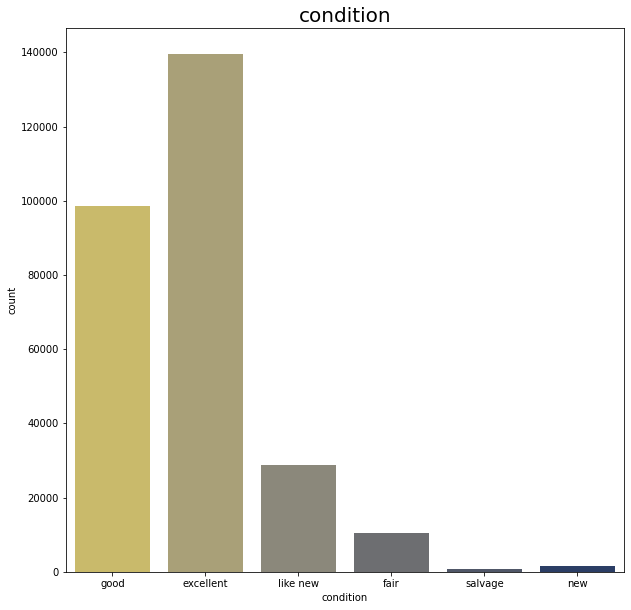

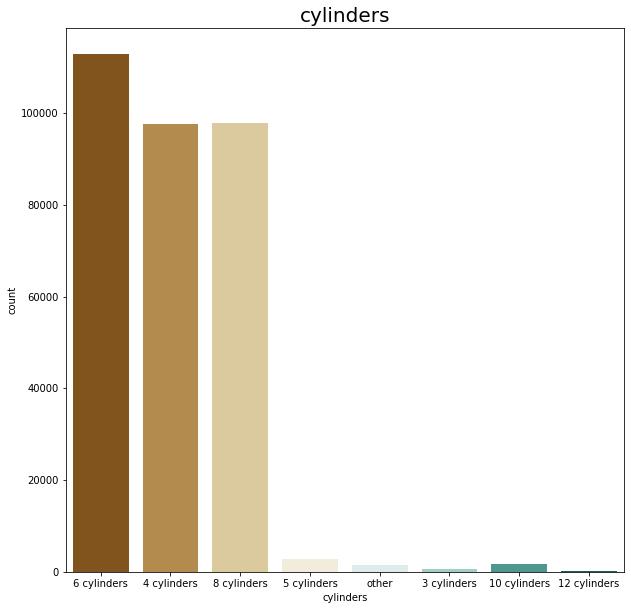

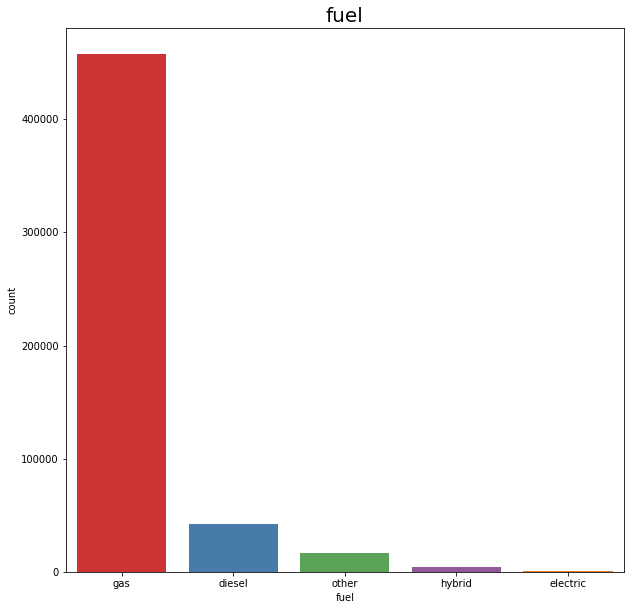

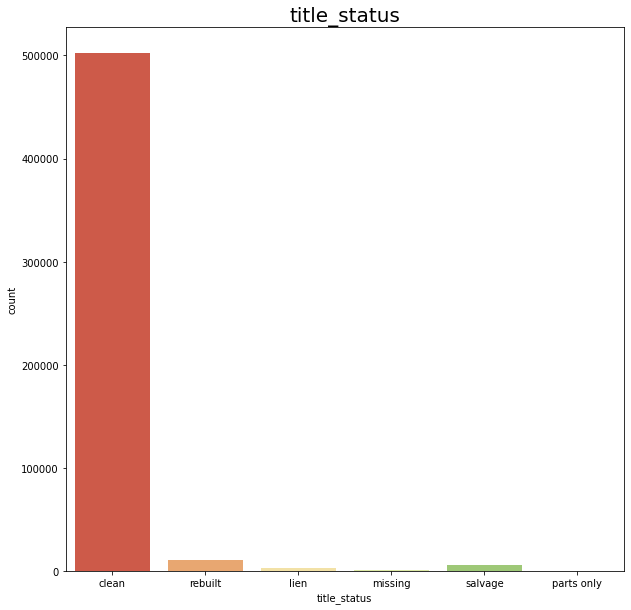

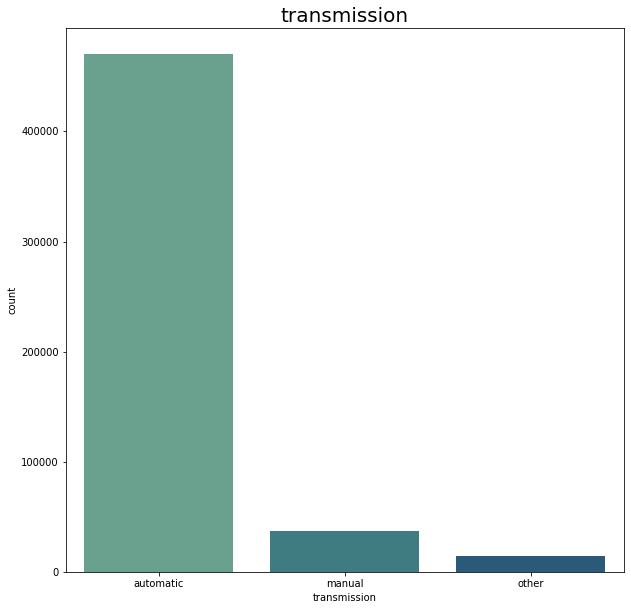

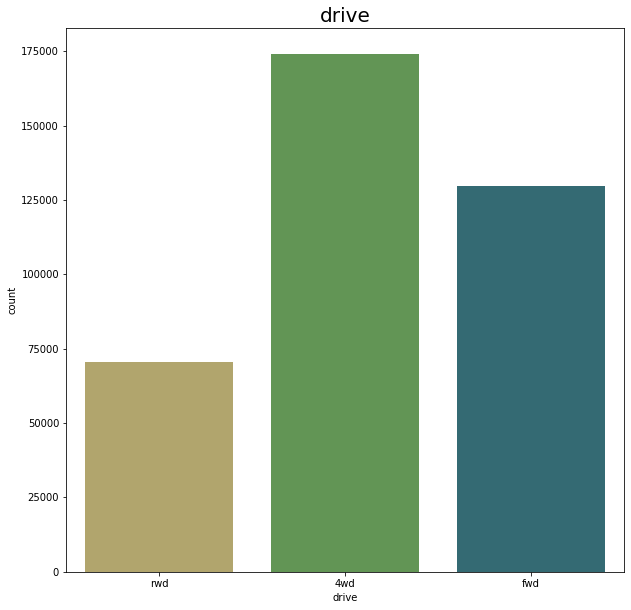

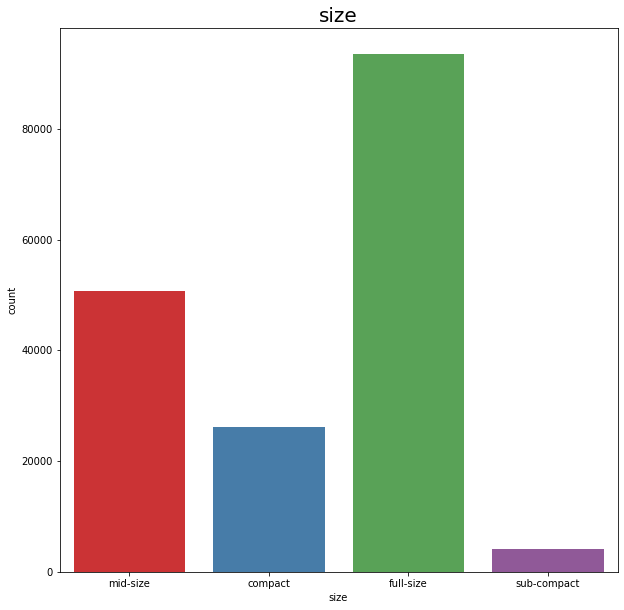

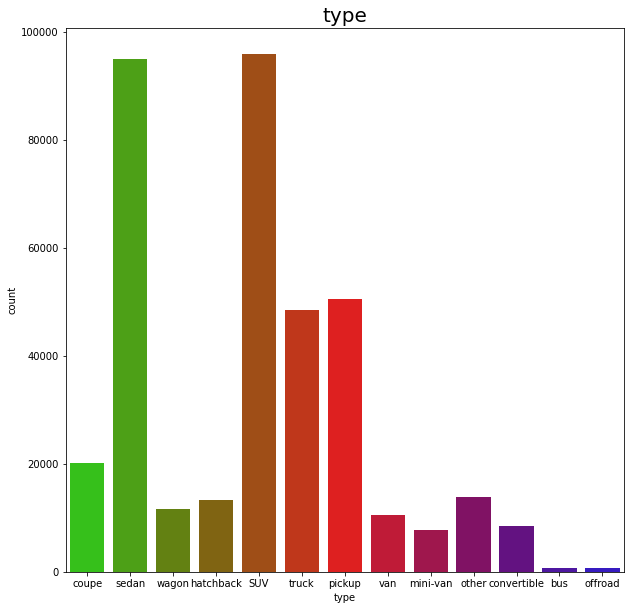

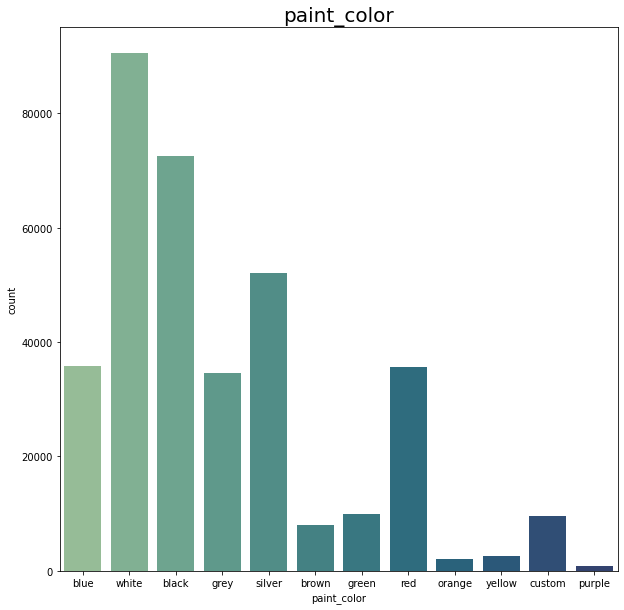

,PridictorVariables,TargetVariables,ObjectDatatypes,NumericDatatypes,CategoricalVariables,ContinuousVariables
1,city,price,city,price,city=>413,price
2,year,,manufacturer,year,year=>111,make
3,manufacturer,,make,odometer,manufacturer=>42,odometer
4,make,,condition,,condition=>7,
5,condition,,cylinders,,cylinders=>9,
6,cylinders,,fuel,,fuel=>6,
7,fuel,,title_status,,title_status=>7,
8,odometer,,transmission,,transmission=>4,
9,title_status,,drive,,drive=>4,
10,transmission,,size,,size=>5,


In [14]:
identification_table, column_type, column_dtype, column_category = mmf.variable_identifier(df,target_list=['price'],count_plot=True,unique_category=450)
identification_table

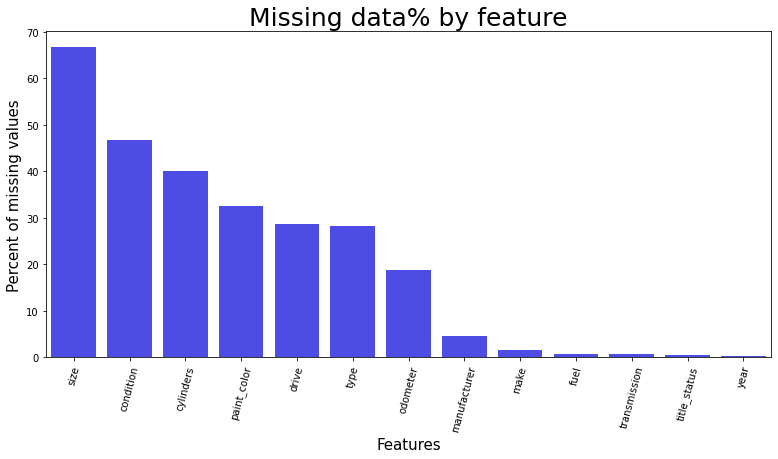

,ColumnName,TotalMissingValues,PercentageMissing,DropNa,FillNa,DropColumn,Criteria
1,size,351320,66.811324,make,paint_color,size,Drop Rows When Missing Data Is Less Than 3.0%
2,condition,245958,46.774393,fuel,drive,condition,Fill Na When Missing Data Is Less Than 40.0%
3,cylinders,210400,40.012247,transmission,type,cylinders,Drop Columns When Missing Data Is More Than 60.0%
4,paint_color,171533,32.620821,title_status,odometer,,
5,drive,151364,28.785237,year,manufacturer,,
6,type,148933,28.322928,,,,
7,odometer,98591,18.749275,,,,
8,manufacturer,24579,4.674244,,,,
9,make,8638,1.642708,,,,
10,fuel,4295,0.816790,,,,


In [15]:
missingdata = mmf.missingdata(df,getTable=True)

### Instead of dropping the columns in **DropColumn** we will try to **fill those values**

## Outliers

In [16]:
df.columns

Index(['city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [17]:
df['size'].unique()

array(['mid-size', nan, 'compact', 'full-size', 'sub-compact'],
      dtype=object)

In [18]:
df.price

0          1500
1          8900
2          7995
3          6995
4         20990
          ...  
525834    11000
525835     6500
525836     3000
525837     8488
525838     6150
Name: price, Length: 525839, dtype: int64

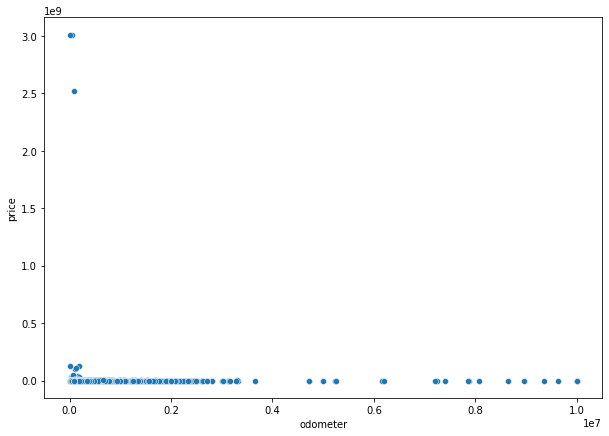

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(y = 'price',x='odometer',data=df,palette=choice(color['scatterplot']))
plt.show()

In [20]:
df[df.price==df.price.max()]

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
417475,parkersburg-marietta,3048344231,2007.0,nissan,murano sl awd,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN


In [21]:
df[df.price>=2.e9]

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
41123,mcallen / edinburg,3009548743,2017.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,49900.0,clean,automatic,4wd,full-size,offroad,grey
44280,"memphis, TN",2521176519,2009.0,rover,lr3 hse,excellent,8 cylinders,gas,91350.0,clean,automatic,4wd,NaN,NaN,NaN
159258,"austin, TX",2521176519,2012.0,honda,civic,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN
189587,"brownsville, TX",3009548743,2019.0,toyota,tacoma,excellent,4 cylinders,gas,5200.0,clean,automatic,rwd,mid-size,pickup,white
380834,monterey bay,2225852293,1991.0,honda,NaN,NaN,NaN,gas,NaN,clean,manual,NaN,NaN,NaN,NaN
417475,parkersburg-marietta,3048344231,2007.0,nissan,murano sl awd,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN


### They are our **outliers**

   price = 257.3382987970626 


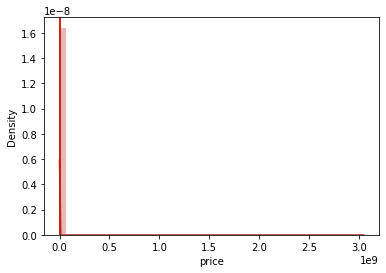

---------------------------------------------------------------------------------
   year = nan 


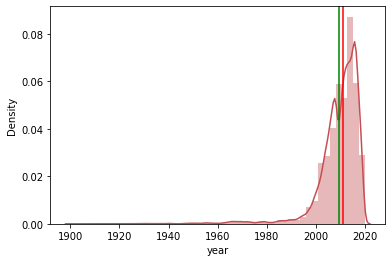

---------------------------------------------------------------------------------
   odometer = nan 


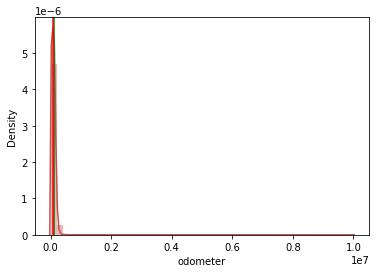

---------------------------------------------------------------------------------


In [22]:
mmf.skewness(column_dtype.NumericDatatypes[:3],df)

These are some highly skewed columns

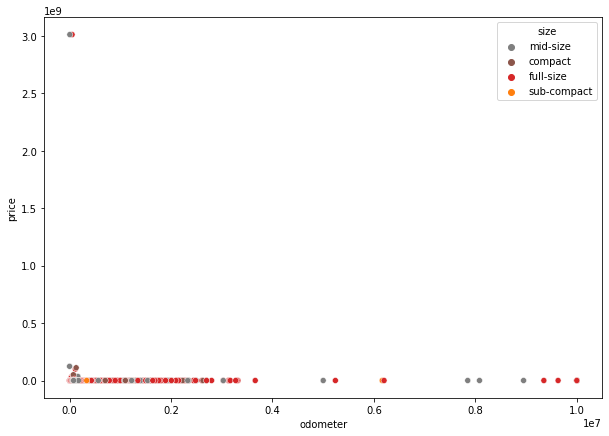

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(y = 'price',x='odometer',hue = 'size',data=df,palette=choice(color['scatterplot']))
plt.show()

##### Since year cant be filled we will dropn na values

In [24]:
df.dropna(subset=['year'],inplace=True)

# Handeling outliers

In [25]:
a = sorted(df.price)
b = sorted(df.odometer)
for i in range(13):
    per1,per2 = np.percentile(a,[i,95])
    # per3,per4 = np.percentile(b,[i,90])
    display(i,[per1,per2])#,[per3,per4])

0

[0.0, 34500.0]

1

[0.0, 34500.0]

2

[0.0, 34500.0]

3

[0.0, 34500.0]

4

[0.0, 34500.0]

5

[0.0, 34500.0]

6

[0.0, 34500.0]

7

[0.0, 34500.0]

8

[0.0, 34500.0]

9

[0.0, 34500.0]

10

[100.0, 34500.0]

11

[500.0, 34500.0]

12

[927.0, 34500.0]

In [26]:
len(df[df.price<100]),len(df[df.price>=35000.0]),len(df[df.odometer<24235.0]),len(df[df.odometer>=180000.0])

(52411, 23930, 43444, 41794)

   price = 256.98568733691866 


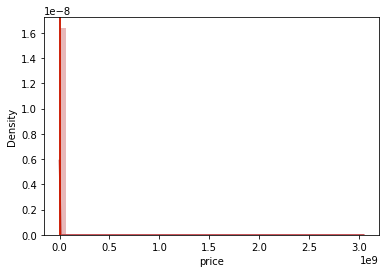

---------------------------------------------------------------------------------
   odometer = nan 


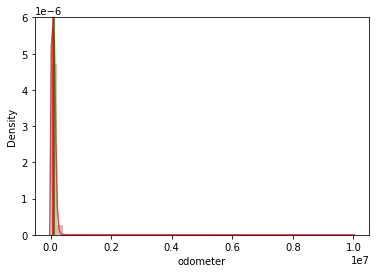

---------------------------------------------------------------------------------


In [27]:
mmf.skewness(column_dtype.NumericDatatypes[[1,3]],df)

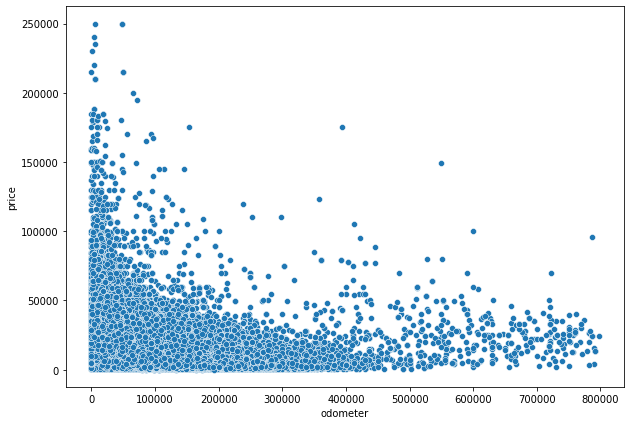

   price = 2.63409334010647 


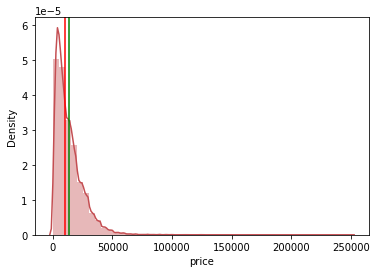

---------------------------------------------------------------------------------
   odometer = nan 


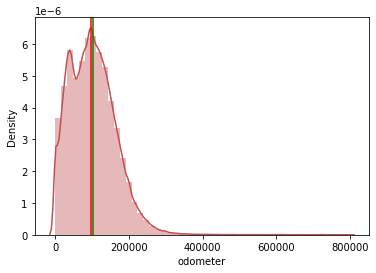

---------------------------------------------------------------------------------


In [28]:
def price_skew(maxprice=.25e6,minprice=100,maxodo=.8e6,minodo=0):#After a lot of adjusments selected this value
    df.drop(df[df.price<minprice].index,inplace=True)
    df.drop(df[df.odometer<minodo].index,inplace=True)

    df.drop(df[df.price>=maxprice].index,inplace=True)

    df.drop(df[df.odometer>=maxodo].index,inplace=True)

    plt.figure(figsize=(10,7))
    sns.scatterplot(y = 'price',x='odometer',data=df,palette=choice(color['scatterplot']))
    plt.show()
    mmf.skewness(column_dtype.NumericDatatypes[[1,3]],df)
price_skew()

we have been able to improve the skewness of price by a lot. Will continue this process after filling missing values

In [29]:
df.shape

(471207, 15)

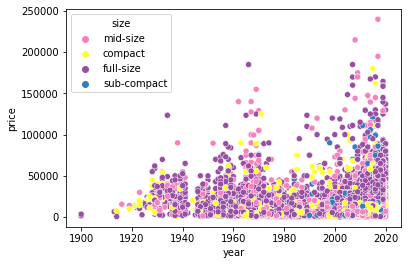

In [30]:
sns.scatterplot(y = 'price',x='year',hue = 'size',data=df,palette=choice(color['scatterplot']))
plt.show()

In [31]:
df.year.min()

1900.0

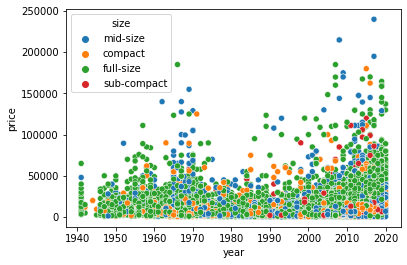

In [32]:
df = df[df.year>1940]
sns.scatterplot(y = 'price',x='year',hue = 'size',data=df[df.year>1940],palette=choice(color['scatterplot']))
plt.show()

   year = -2.7942293821584347 


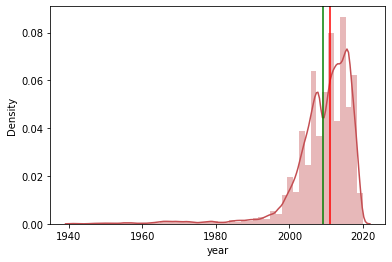

---------------------------------------------------------------------------------


In [33]:
mmf.skewness(column_dtype.NumericDatatypes[[2]],df)

#### Now reducing the skewness is done

In [34]:
column_category.CategoricalVariables

1            city=>413
2            year=>111
3     manufacturer=>42
4         condition=>7
5         cylinders=>9
6              fuel=>6
7      title_status=>7
8      transmission=>4
9             drive=>4
10             size=>5
11            type=>14
12     paint_color=>13
Name: CategoricalVariables, dtype: object

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x=df.manufacturer,y=df.price,palette=choice(color['barplot']))
plt.xticks(rotation=55)
plt.show()

Again these outliers will be dealt with after handeling missing data

#### Now here I am trying to Find a correct approach to fill the missing values

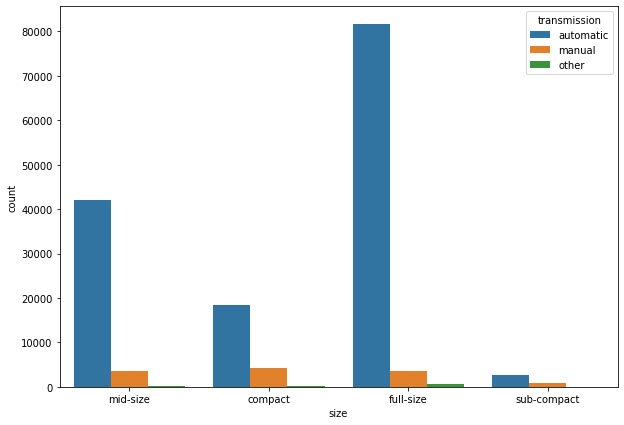

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(hue = 'transmission',x = 'size',data=df)
plt.show()

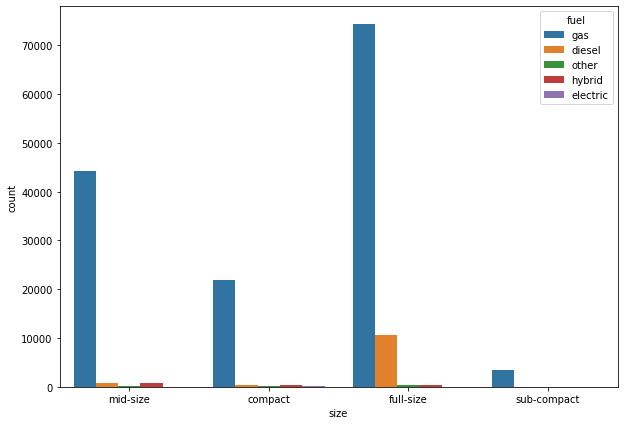

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(hue = 'fuel',x = 'size',data=df)
plt.show()

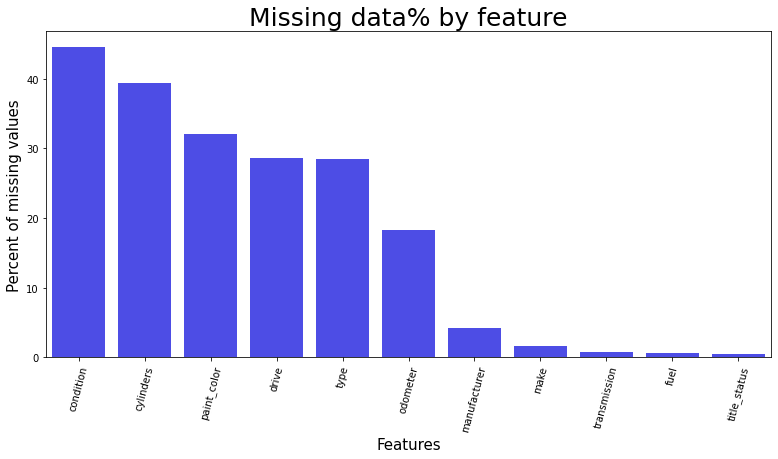

,ColumnName,TotalMissingValues,PercentageMissing,DropNa,FillNa,DropColumn,Criteria
1,condition,209662,44.560583,make,cylinders,condition,Drop Rows When Missing Data Is Less Than 3%
2,cylinders,185369,39.397462,transmission,paint_color,,Fill Na When Missing Data Is Less Than 40%
3,paint_color,150582,32.003996,fuel,drive,,Drop Columns When Missing Data Is More Than 60.0%
4,drive,134411,28.567087,title_status,type,,
5,type,134169,28.515653,,odometer,,
6,odometer,86138,18.307369,,manufacturer,,
7,manufacturer,20003,4.251344,,,,
8,make,7502,1.594440,,,,
9,transmission,3690,0.784255,,,,
10,fuel,3105,0.659922,,,,


In [38]:
df['size'].fillna(method='ffill',inplace=True)
def missing():
    mmf.missingdata(df,drop_na=3,fill_na=40,getTable=True)
missing()

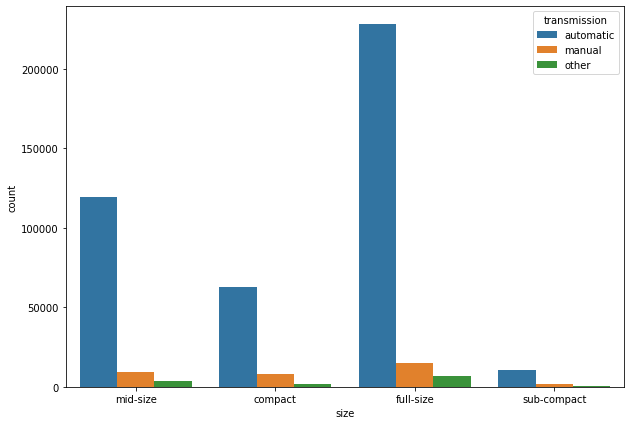

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(hue = 'transmission',x = 'size',data=df)
plt.show()

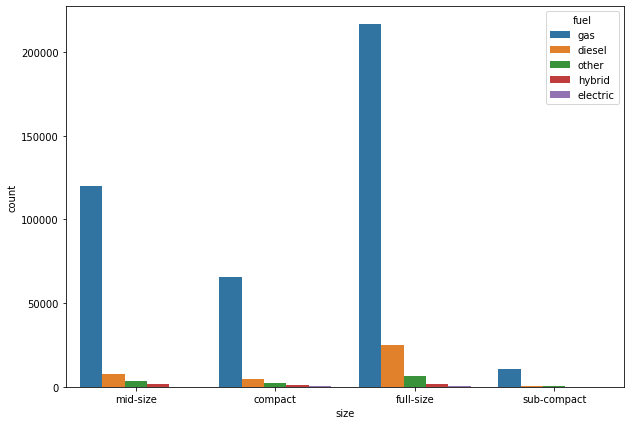

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'size',hue = 'fuel',data=df)
plt.show()

#### The **figure of the graph remains** almost **same** though **count number has significantly increased**. I would say **we can use this for prediction**

In [41]:
df.condition.unique()

array(['good', nan, 'excellent', 'like new', 'fair', 'salvage', 'new'],
      dtype=object)

In [42]:
df.sample(1)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
19695,kennewick-pasco-richland,17991,2015.0,lexus,ct 200h,NaN,4 cylinders,hybrid,48668.0,clean,automatic,fwd,mid-size,sedan,red


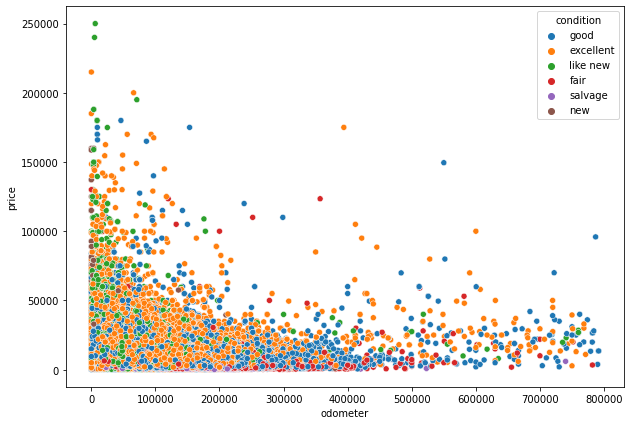

In [43]:
plt.figure(figsize=(10,7))
sns.scatterplot(df.odometer,df.price,hue=df.condition)
plt.show()

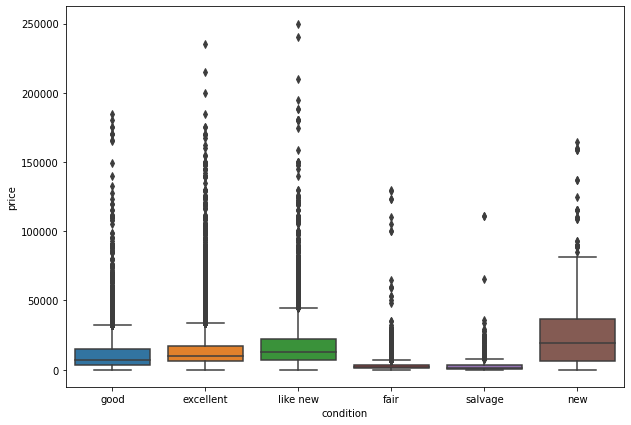

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(df.condition,df.price)
plt.show()

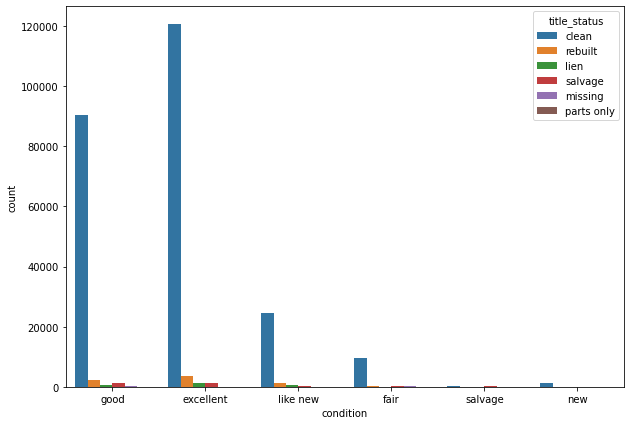

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(df.condition,hue=df.title_status)
plt.show()

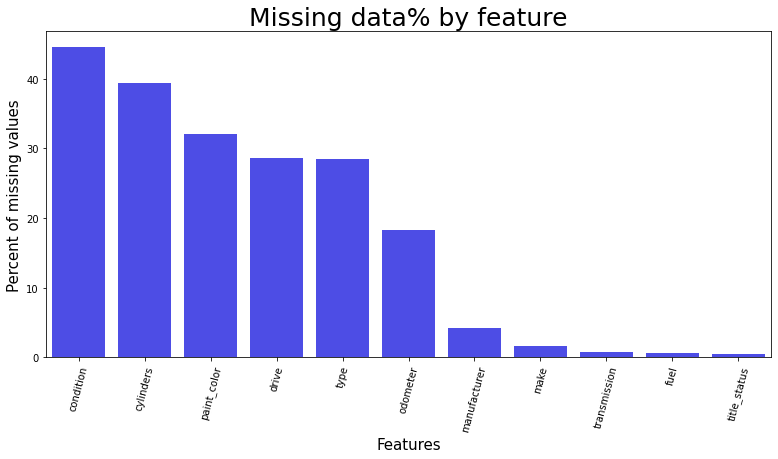

,ColumnName,TotalMissingValues,PercentageMissing,DropNa,FillNa,DropColumn,Criteria
1,condition,209662,44.560583,make,cylinders,condition,Drop Rows When Missing Data Is Less Than 3%
2,cylinders,185369,39.397462,transmission,paint_color,,Fill Na When Missing Data Is Less Than 40%
3,paint_color,150582,32.003996,fuel,drive,,Drop Columns When Missing Data Is More Than 60.0%
4,drive,134411,28.567087,title_status,type,,
5,type,134169,28.515653,,odometer,,
6,odometer,86138,18.307369,,manufacturer,,
7,manufacturer,20003,4.251344,,,,
8,make,7502,1.594440,,,,
9,transmission,3690,0.784255,,,,
10,fuel,3105,0.659922,,,,


In [46]:
missing()

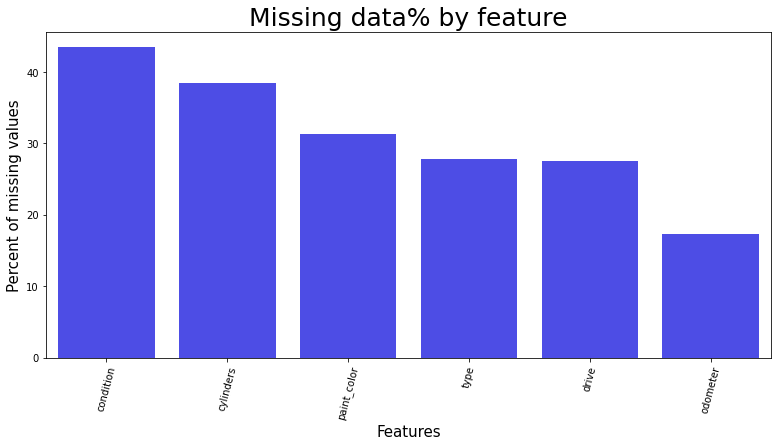

,ColumnName,TotalMissingValues,PercentageMissing,DropNa,FillNa,DropColumn,Criteria
1,condition,189176,43.472746,,cylinders,condition,Drop Rows When Missing Data Is Less Than 3%
2,cylinders,167199,38.422419,,paint_color,,Fill Na When Missing Data Is Less Than 40%
3,paint_color,136510,31.370071,,type,,Drop Columns When Missing Data Is More Than 60.0%
4,type,120843,27.769786,,drive,,
5,drive,120119,27.603410,,odometer,,
6,odometer,75478,17.344885,,,,


In [47]:
df.dropna(subset=missingdata.DropNa[:4],inplace=True)
df.dropna(subset=missingdata.FillNa[[5]],inplace=True)
missingdata = mmf.missingdata(df,drop_na=3,fill_na=40,getTable=True)

In [48]:
missingdata

,ColumnName,TotalMissingValues,PercentageMissing,DropNa,FillNa,DropColumn,Criteria
1,condition,189176,43.472746,,cylinders,condition,Drop Rows When Missing Data Is Less Than 3%
2,cylinders,167199,38.422419,,paint_color,,Fill Na When Missing Data Is Less Than 40%
3,paint_color,136510,31.370071,,type,,Drop Columns When Missing Data Is More Than 60.0%
4,type,120843,27.769786,,drive,,
5,drive,120119,27.603410,,odometer,,
6,odometer,75478,17.344885,,,,


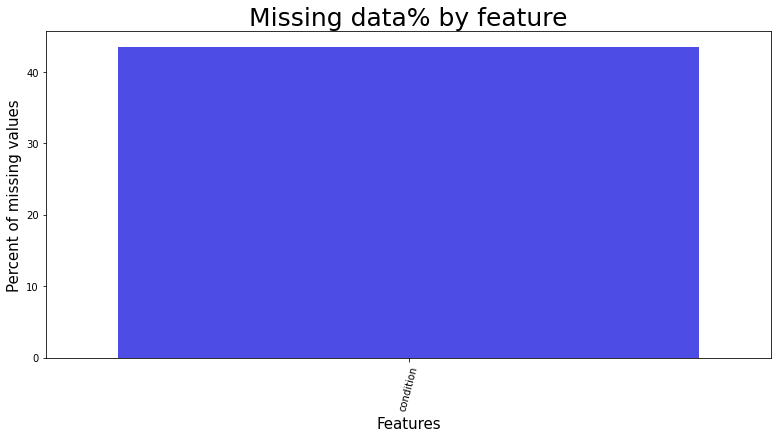

,ColumnName,TotalMissingValues,PercentageMissing,DropNa,FillNa,DropColumn,Criteria
1,condition,189176.0,43.472746,,,condition,Drop Rows When Missing Data Is Less Than 3%
2,,,,,,,Fill Na When Missing Data Is Less Than 40%
3,,,,,,,Drop Columns When Missing Data Is More Than 60.0%


In [49]:
for i in missingdata.FillNa[:5]:
    df[i]=df[i].fillna(method='ffill')
missing()

**cylinders** and **paint_color** seems to be an **important factor** for purchasing cars so going to **fill it instead of dropping the column**

In [50]:
excellent_mean = round(df[df.condition == 'excellent'].odometer.mean(),2)
good_mean = round(df[df.condition == 'good'].odometer.mean(),2)
lnew_mean = round(df[df.condition == 'like new'].odometer.mean(),2)
salvage_mean = round(df[df.condition == 'salvage'].odometer.mean(),2)
fair_mean = round(df[df.condition == 'fair'].odometer.mean(),2)

In [51]:
df.condition.unique()

array(['good', nan, 'excellent', 'like new', 'fair', 'salvage', 'new'],
      dtype=object)

In [52]:
d = pd.Series({excellent_mean:'excellent',good_mean:'good',lnew_mean:'like new',salvage_mean:'salvage',fair_mean:'fair'})
for i in sorted(d.index):
    print(f"{d[i]}{' '*5}{i}")

like new     81940.58
excellent     105125.96
good     115526.26
salvage     131082.65
fair     157016.26


In [53]:
print('Like new average odometer  :', Fore.YELLOW,Back.LIGHTBLUE_EX,Style.NORMAL,f'{lnew_mean} ',Style.RESET_ALL)
print('Excellent average odometer :', Fore.YELLOW,Back.LIGHTBLUE_EX,Style.NORMAL,excellent_mean,Style.RESET_ALL)
print('Good average odometer      :', Fore.YELLOW,Back.LIGHTBLUE_EX,Style.NORMAL,good_mean,Style.RESET_ALL)
print('Fair average odometer      :', Fore.YELLOW,Back.LIGHTBLUE_EX,Style.NORMAL,fair_mean,Style.RESET_ALL)
print('Salvage average odometer   :', Fore.YELLOW,Back.LIGHTBLUE_EX,Style.NORMAL,salvage_mean,Style.RESET_ALL)

Like new average odometer  :    81940.58  
Excellent average odometer :    105125.96 
Good average odometer      :    115526.26 
Fair average odometer      :    157016.26 
Salvage average odometer   :    131082.65 


In [54]:
df.year.max()

2020.0

In [55]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [56]:
df.loc[df['odometer'] <= lnew_mean, 'condition'] = df.loc[df['odometer'] <= lnew_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_mean, 'condition'] = df.loc[df['odometer'] >= fair_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_mean) & (df['odometer'] <= excellent_mean)), 'condition'] = df.loc[((df['odometer'] > good_mean) & (df['odometer'] <= excellent_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > lnew_mean) & (df['odometer'] <= good_mean)), 'condition'] = df.loc[((df['odometer'] > lnew_mean) & (df['odometer'] <= good_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_mean) & (df['odometer'] <= fair_mean)), 'condition'] = df.loc[((df['odometer'] > good_mean) & (df['odometer'] <= fair_mean)), 'condition'].fillna('salvage')

  No Missing Values


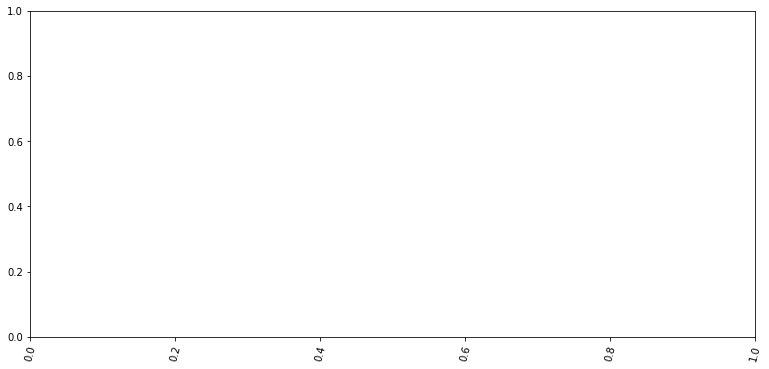

In [57]:
missing()

# Handeling outliers

   manufacturer 


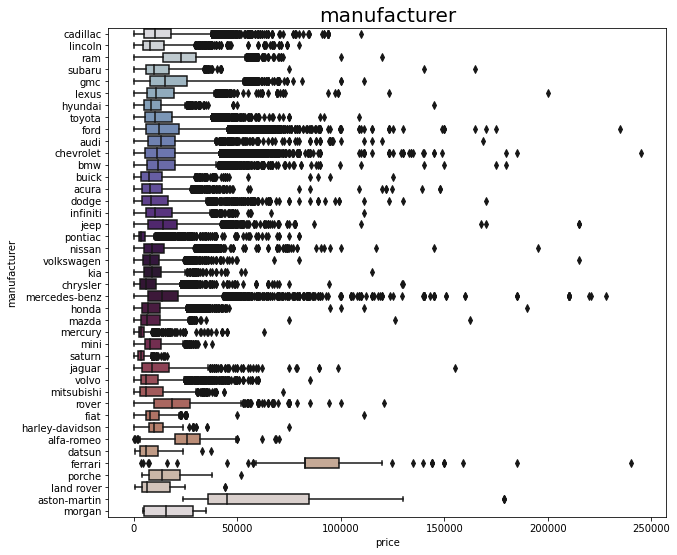

   condition 


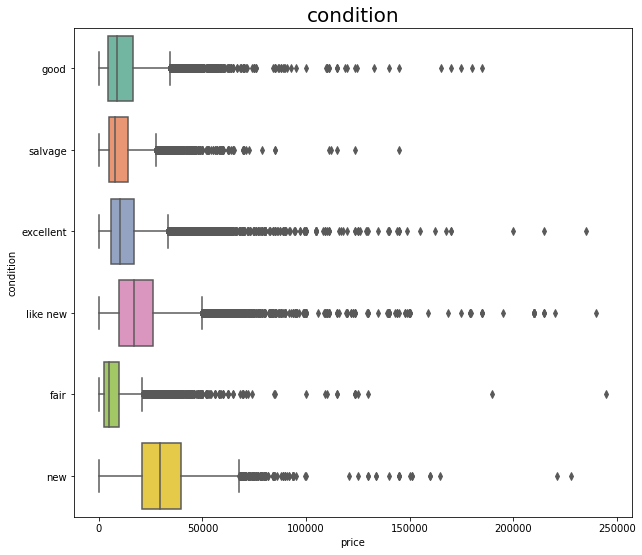

   cylinders 


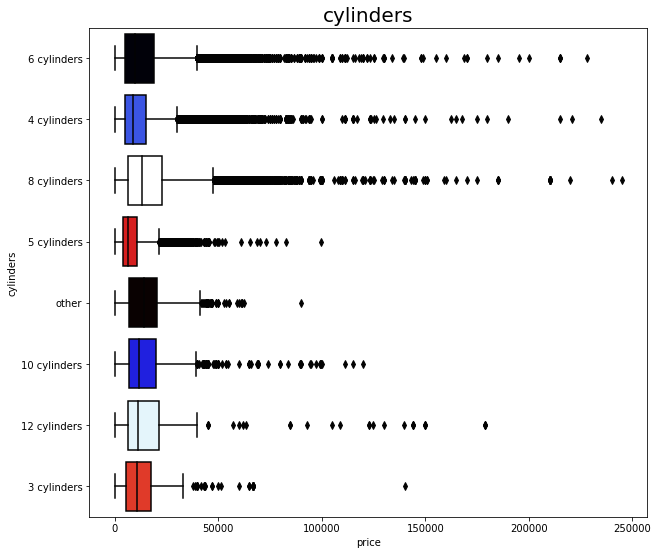

   fuel 


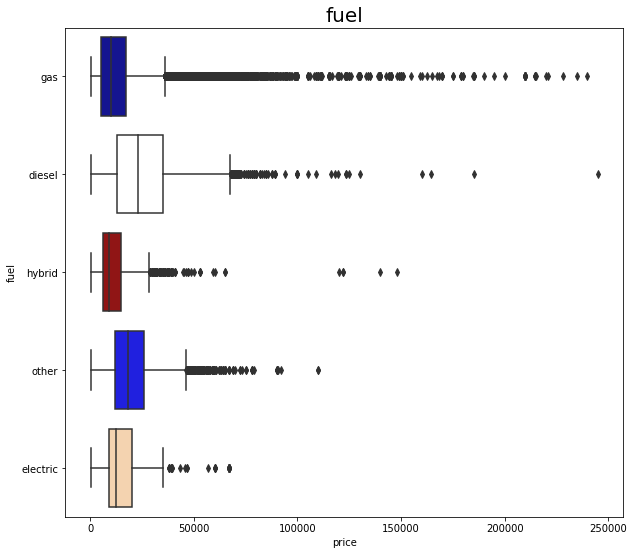

   title_status 


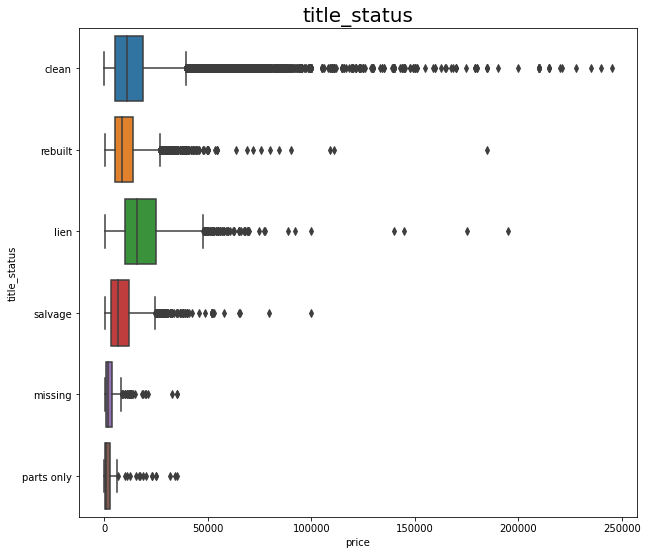

   transmission 


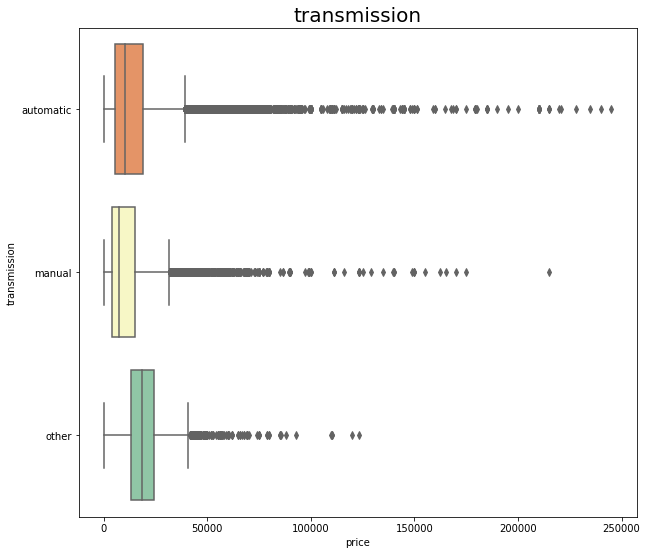

   drive 


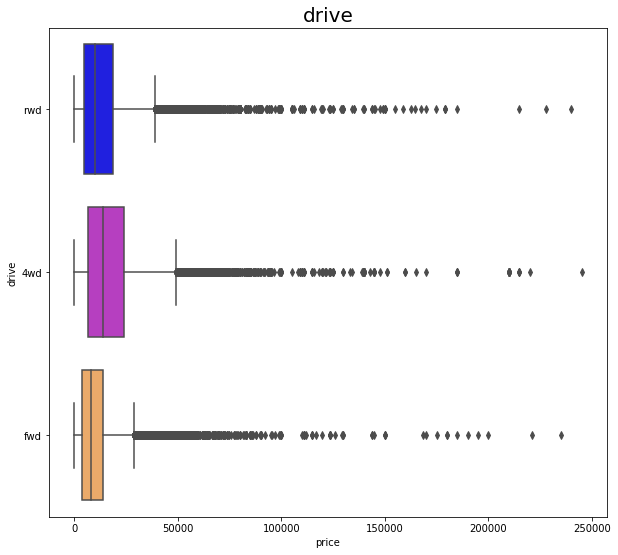

   size 


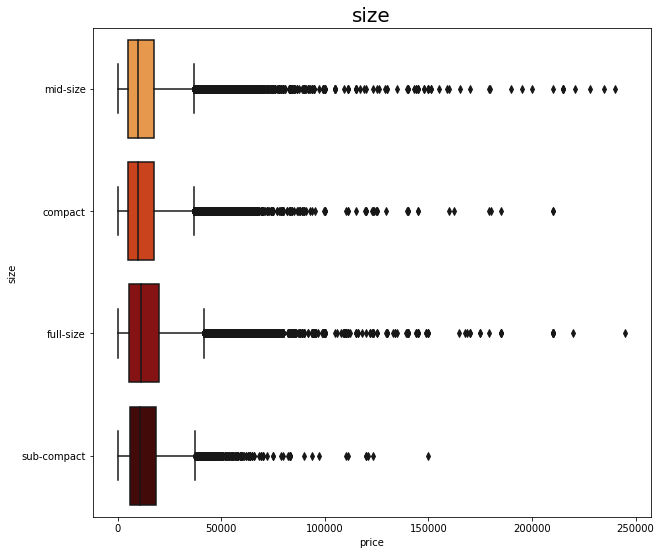

   type 


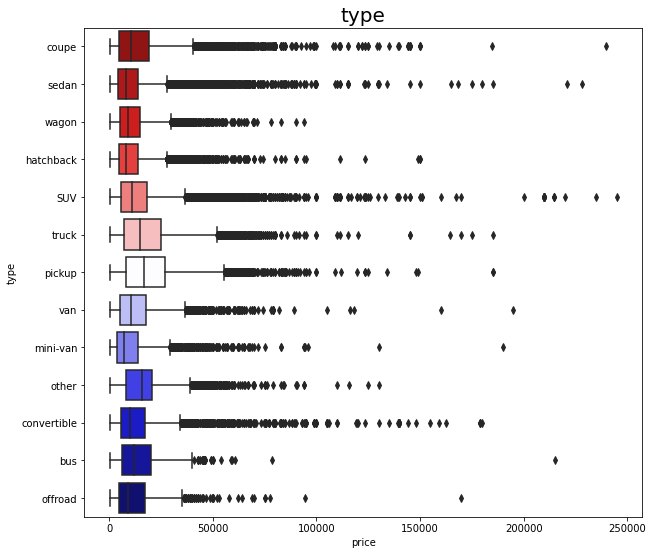

   paint_color 


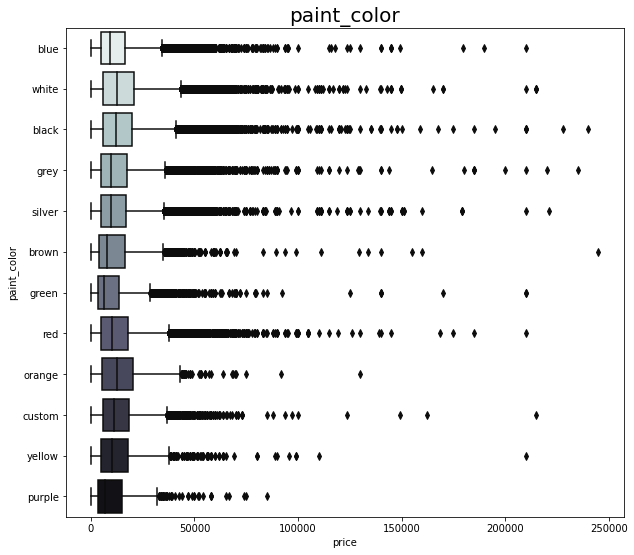

In [58]:
for i in column_category.CategoricalVariables[2:]:
    i = i.split('=')[0]
    statement(i)
    plt.figure(figsize=(10,9))
    sns.boxplot(y=df[i],x=df.price,palette=choice(color['barplot'])).set_title(i,fontsize=20)
    plt.show()

In [59]:
df.shape

(435160, 15)

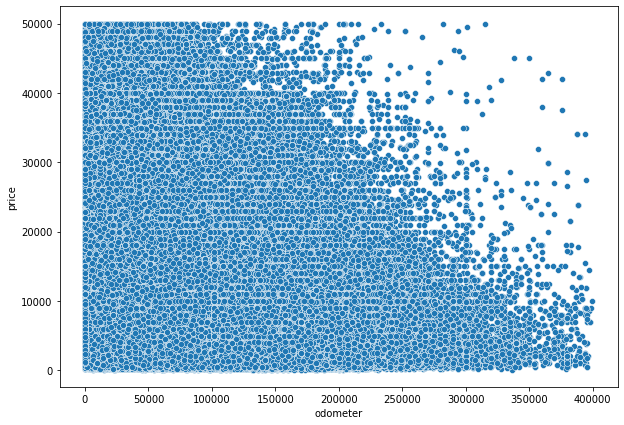

   price = 1.0909415141084813 


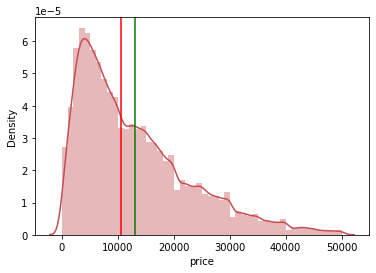

---------------------------------------------------------------------------------
   odometer = 0.5440225924671649 


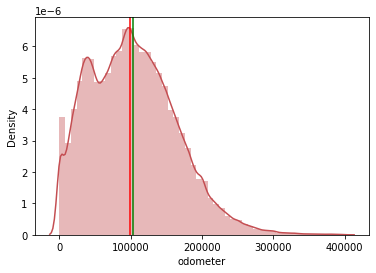

---------------------------------------------------------------------------------


In [60]:
# price_skew(maxprice=1.2e5,maxodo=7.e5)
price_skew(maxprice=5.e4,maxodo=4.e5)

In [61]:
df.shape

(431090, 15)

Skewness of odometer and price drastically improved 

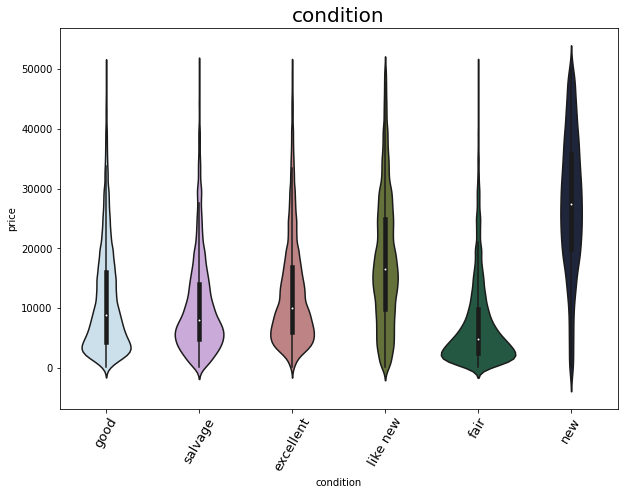

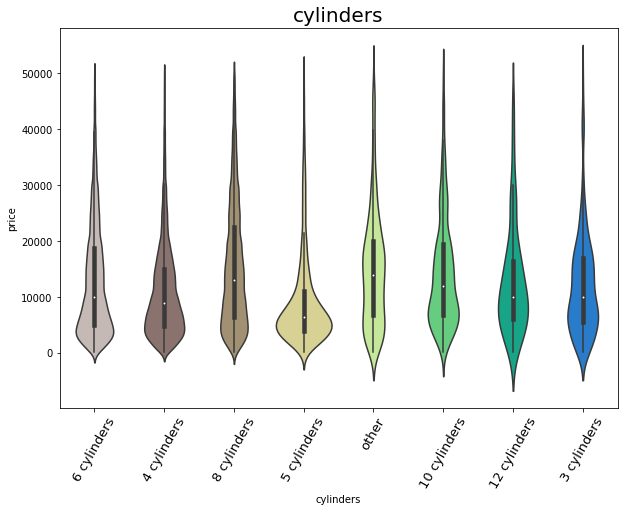

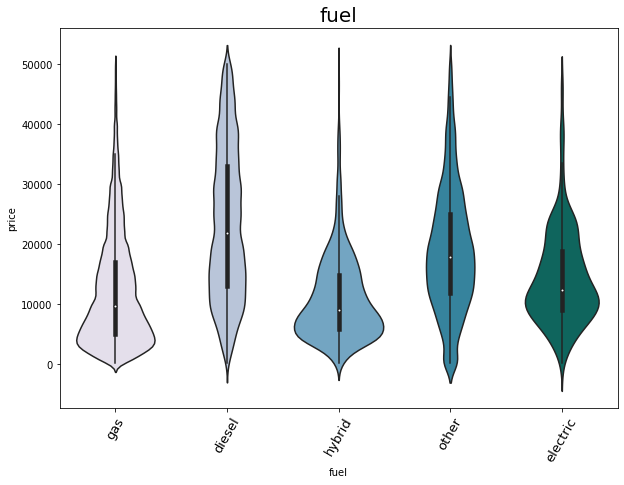

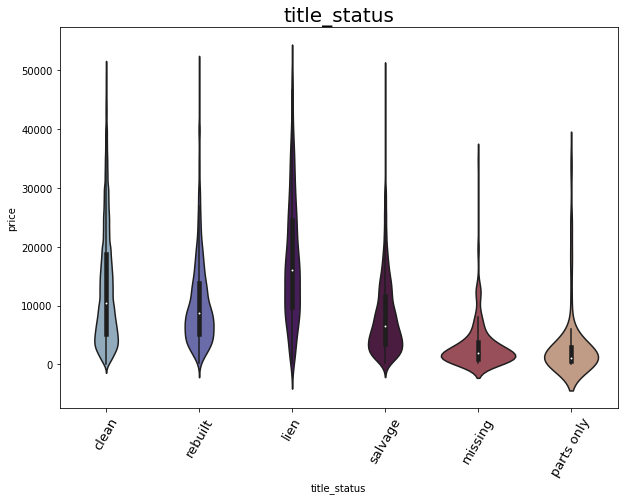

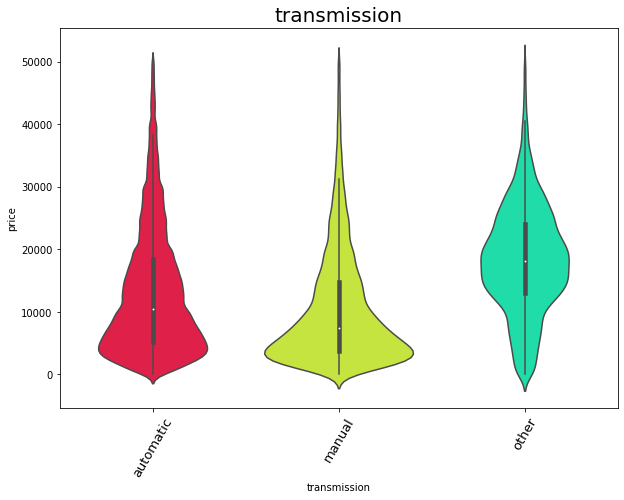

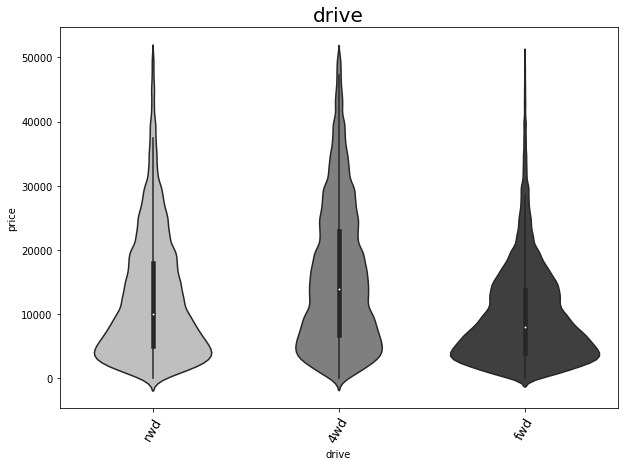

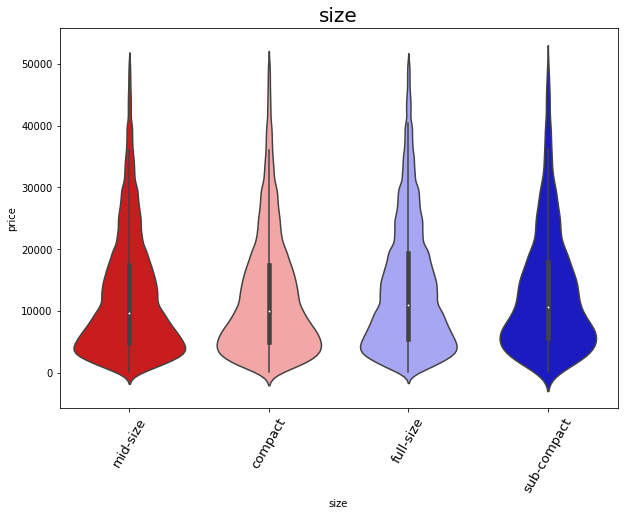

In [62]:
global cols
cols = []
for i in column_category.CategoricalVariables:
    if int(i.split('>')[-1]) <= 10:
        cols.append(i.split('=')[0])
def voilin(df):
    for i in cols:
        plt.figure(figsize=(10,7))
        sns.violinplot(df[i],df.price,palette=choice(color['barplot'])).set_title(i,fontsize=20)
        plt.xticks(rotation=60,fontsize=13)
        plt.show()
voilin(df)

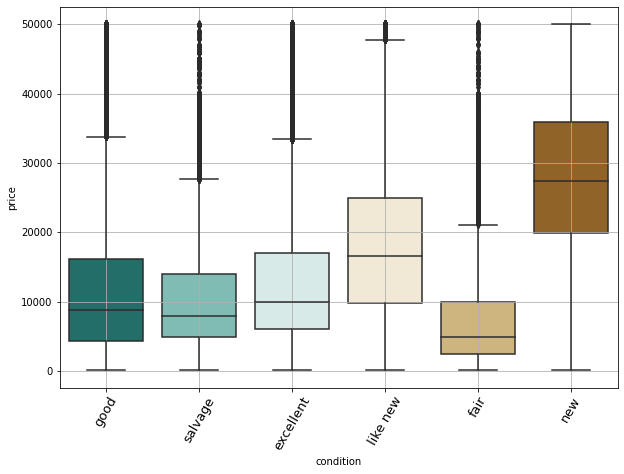

In [63]:
def boxplot(i, df):
    plt.figure(figsize=(10,7))
    sns.boxplot(df[cols[i]],df.price,palette=choice(color['barplot']))
    plt.xticks(rotation=60,fontsize=13)
    plt.grid(True)
    plt.show()
boxplot(0, df)

In [64]:
def outliers(i, max_, df):
    removed = 0
    cat = df[cols[i]].unique()
    li = list(zip(cat,max_))
    for cat, max_ in li:
        sh = df.shape[0]
        df.drop(df[(df[cols[i]] == cat) & (df.price >= max_)].index,inplace=True)
        sh -= df.shape[0]
        display([cat, max_, sh, df.shape])
        removed += sh
    display(df.shape)
    statement(f'Removed rows: {removed}')
    plt.figure(figsize=(10,7))
    sns.boxplot(df[cols[i]],df.price,palette=choice(color['barplot']))
    plt.xticks(rotation=60,fontsize=13)
    plt.grid(True)
    plt.show()

In [65]:
df.drop(df[(df.condition == 'new') & (df.price <= 400)].index, inplace=True)

['good', 31300.0, 4782, (426273, 15)]

['salvage', 25000.0, 2360, (423913, 15)]

['excellent', 28000.0, 8711, (415202, 15)]

['like new', 48000.0, 637, (414565, 15)]

['fair', 13000.0, 5953, (408612, 15)]

['new', 55000.0, 0, (408612, 15)]

(408612, 15)

   Removed rows: 22443 


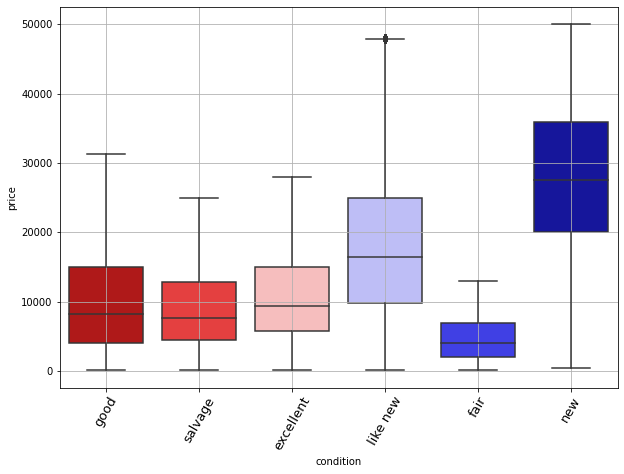

In [66]:
outliers(0, [3.13e4, 2.5e4, 2.8e4, 4.8e4, 1.3e4, 5.5e4], df)

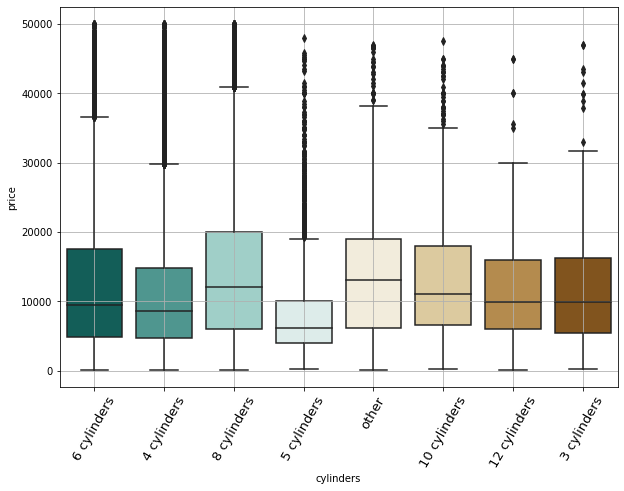

In [67]:
boxplot(1, df)

['6 cylinders', 35500.0, 2807, (405805, 15)]

['4 cylinders', 28000.0, 4359, (401446, 15)]

['8 cylinders', 38500.0, 2760, (398686, 15)]

['5 cylinders', 14500.0, 526, (398160, 15)]

['other', 38000.0, 27, (398133, 15)]

['10 cylinders', 32000.0, 53, (398080, 15)]

['12 cylinders', 28000.0, 11, (398069, 15)]

['3 cylinders', 32000.0, 10, (398059, 15)]

(398059, 15)

   Removed rows: 10553 


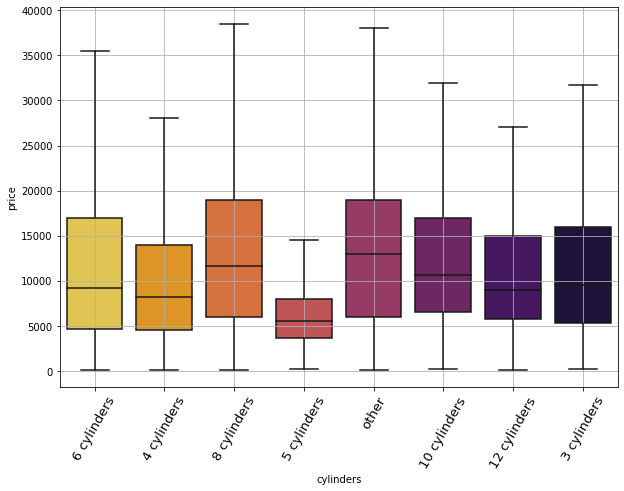

In [68]:
outliers(1,[3.55e4, 2.8e4, 3.85e4, 1.45e4, 3.8e4, 3.2e4, 2.8e4, 3.2e4], df)

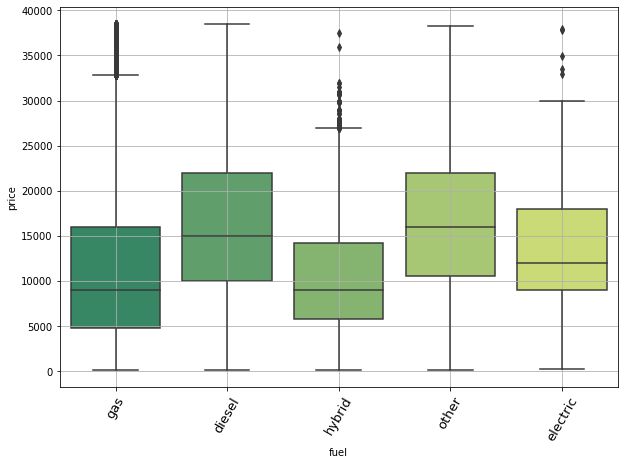

In [69]:
boxplot(2, df)

['gas', 32500.0, 3870, (394189, 15)]

['diesel', 40000.0, 0, (394189, 15)]

['hybrid', 26500.0, 63, (394126, 15)]

['other', 40000.0, 0, (394126, 15)]

['electric', 31000.0, 5, (394121, 15)]

(394121, 15)

   Removed rows: 3938 


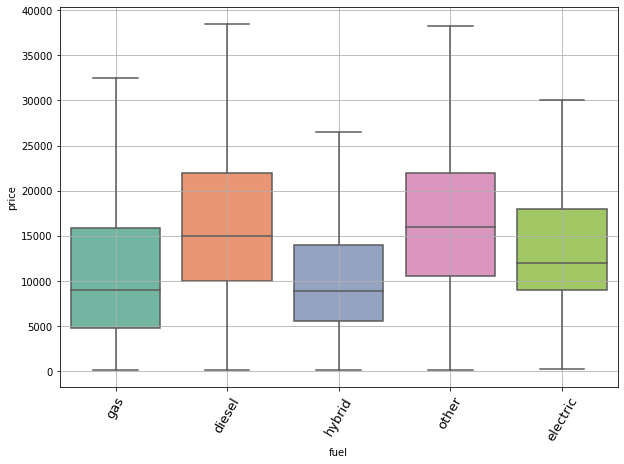

In [70]:
outliers(2, [3.25e4, 4.e4, 2.65e4, 4.e4, 3.1e4], df)

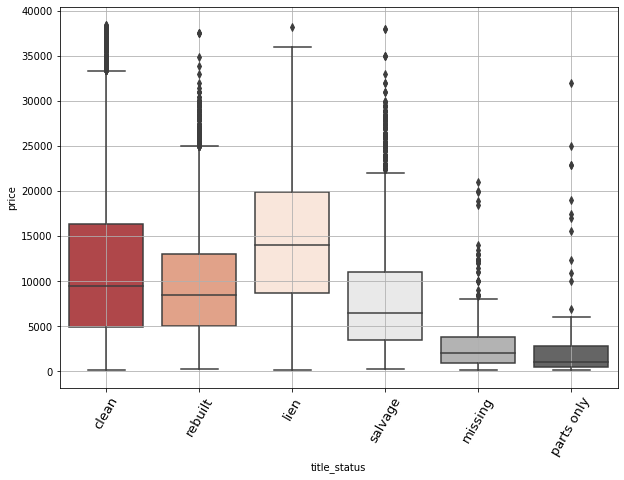

In [71]:
boxplot(3, df)

['clean', 32500.0, 654, (393467, 15)]

['rebuilt', 19900.0, 755, (392712, 15)]

['lien', 37000.0, 1, (392711, 15)]

['salvage', 20000.0, 251, (392460, 15)]

['missing', 6000.0, 67, (392393, 15)]

['parts only', 5000.0, 15, (392378, 15)]

(392378, 15)

   Removed rows: 1743 


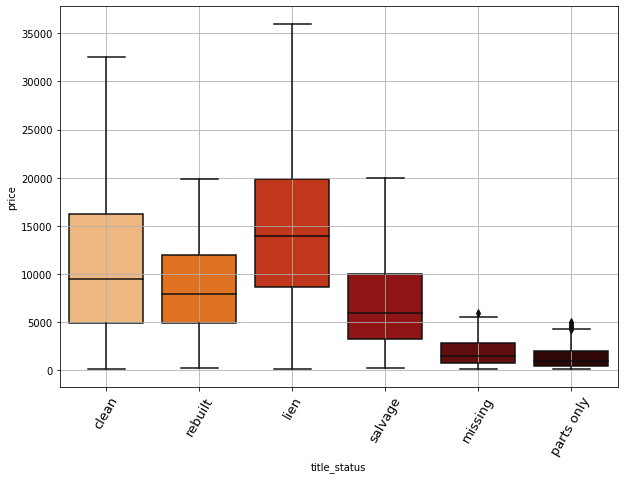

['clean', 32500.0, 0, (392378, 15)]

['rebuilt', 19900.0, 0, (392378, 15)]

['lien', 37000.0, 0, (392378, 15)]

['salvage', 20000.0, 0, (392378, 15)]

['missing', 6000.0, 0, (392378, 15)]

['parts only', 2300.0, 33, (392345, 15)]

(392345, 15)

   Removed rows: 33 


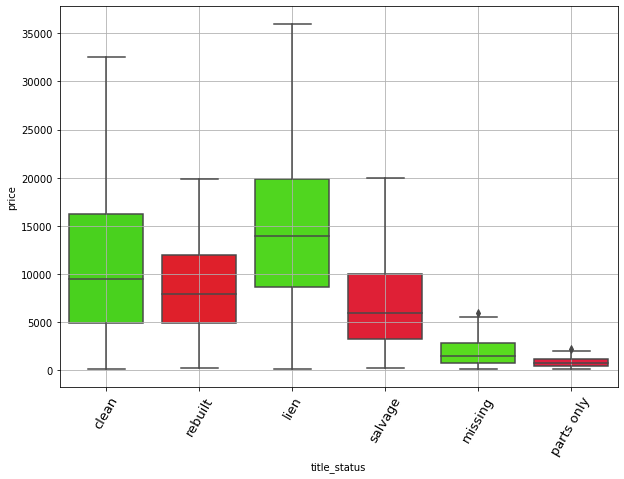

In [72]:
outliers(3, [3.25e4, 1.99e4, 3.7e4, 2.e4, 6.e3, 5.e3], df)
df2 = df.copy()
outliers(3, [3.25e4, 1.99e4, 3.7e4, 2.e4, 6.e3, 2.3e3], df2)      #stratify

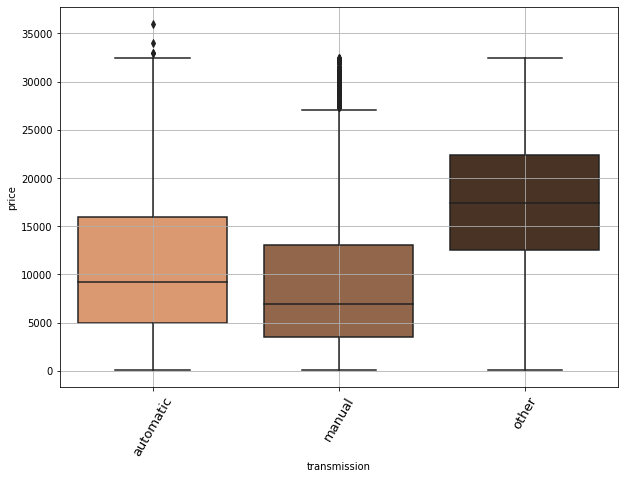

In [73]:
boxplot(4, df)

['automatic', 32800.0, 4, (392374, 15)]

['manual', 24700.0, 1101, (391273, 15)]

['other', 35000.0, 0, (391273, 15)]

(391273, 15)

   Removed rows: 1105 


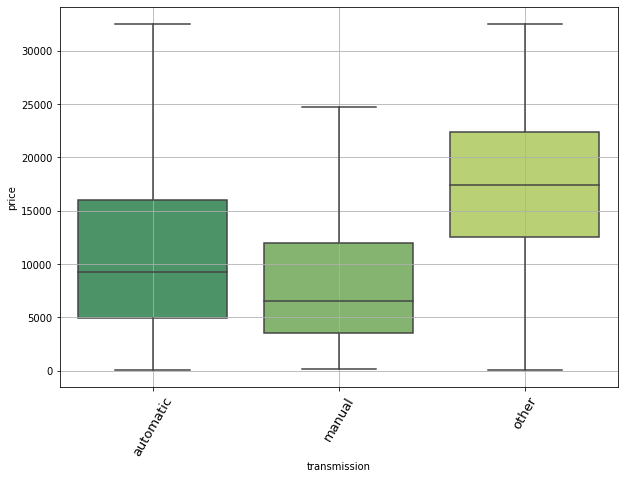

In [74]:
outliers(4, [3.28e4, 2.47e4, 3.5e4], df)

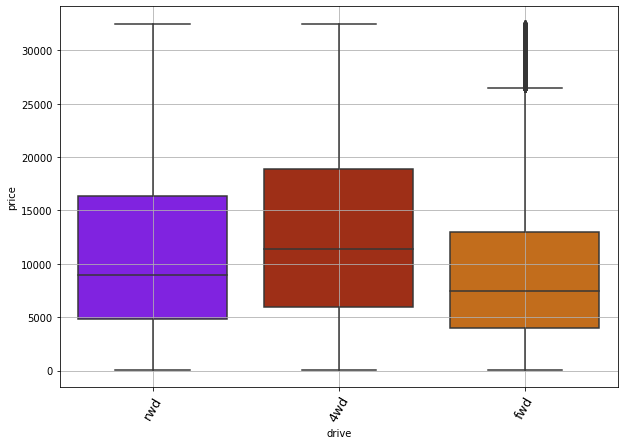

In [75]:
boxplot(5, df)

['rwd', 35000.0, 0, (391273, 15)]

['4wd', 35000.0, 0, (391273, 15)]

['fwd', 26200.0, 1983, (389290, 15)]

(389290, 15)

   Removed rows: 1983 


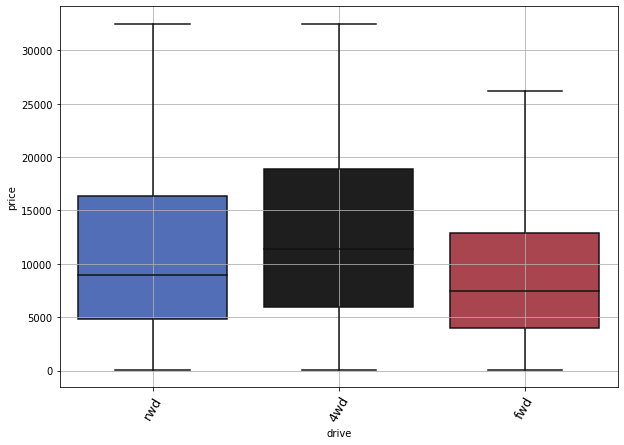

In [76]:
outliers(5, [3.5e4, 3.5e4, 2.62e4], df)

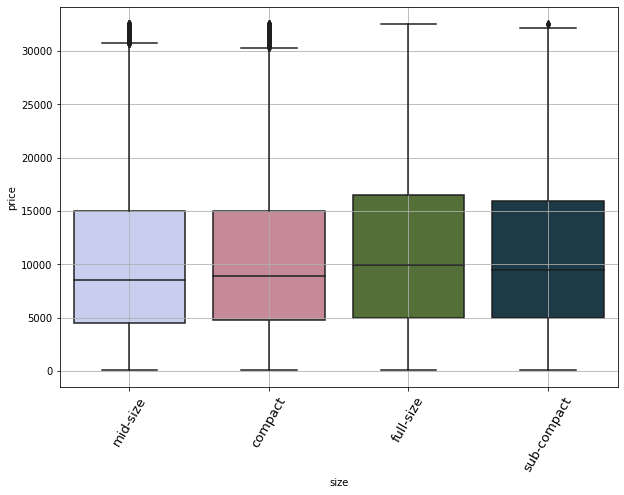

In [77]:
boxplot(6, df)

In [78]:
df3 = df.copy()

['mid-size', 30500.0, 558, (388732, 15)]

['compact', 30400.0, 305, (388427, 15)]

['full-size', 35000.0, 0, (388427, 15)]

['sub-compact', 32400.0, 3, (388424, 15)]

(388424, 15)

   Removed rows: 866 


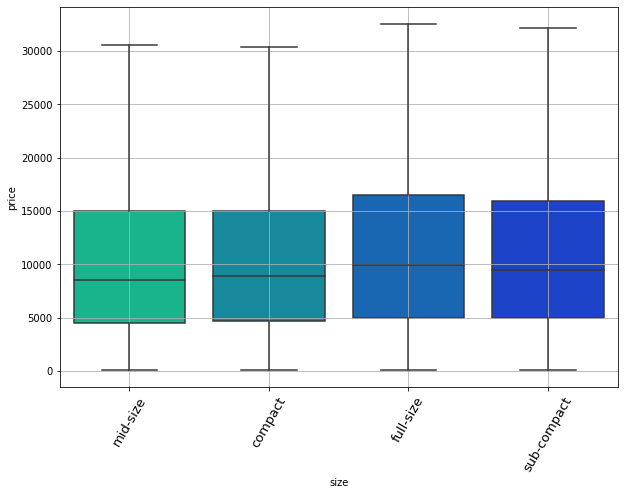

In [79]:
outliers(6, [3.05e4, 3.04e4, 3.5e4, 3.24e4], df)

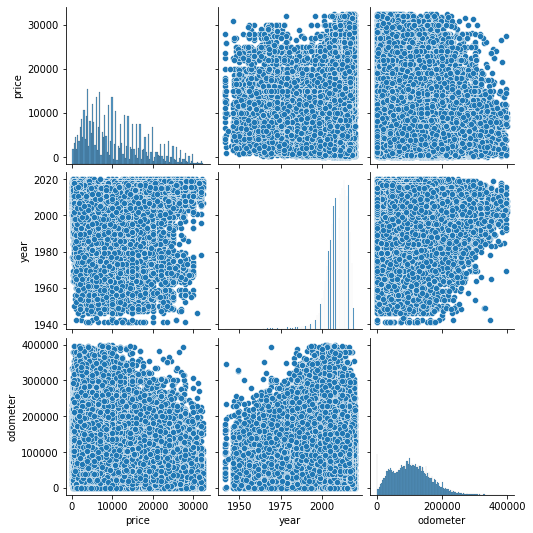

Wall time: 5.78 s


In [80]:
%%time
sns.pairplot(df)
plt.show()

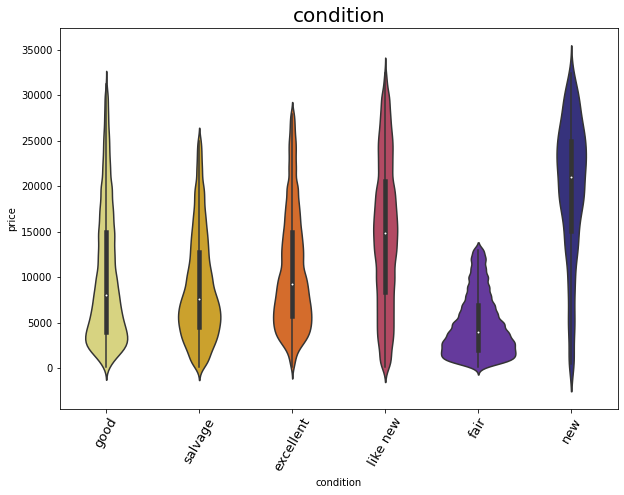

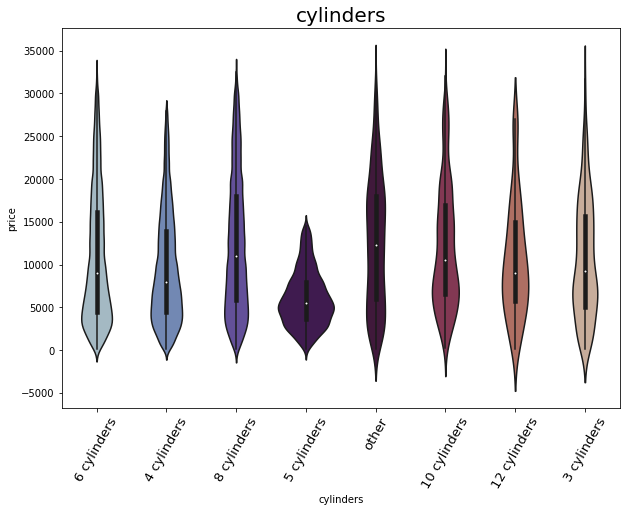

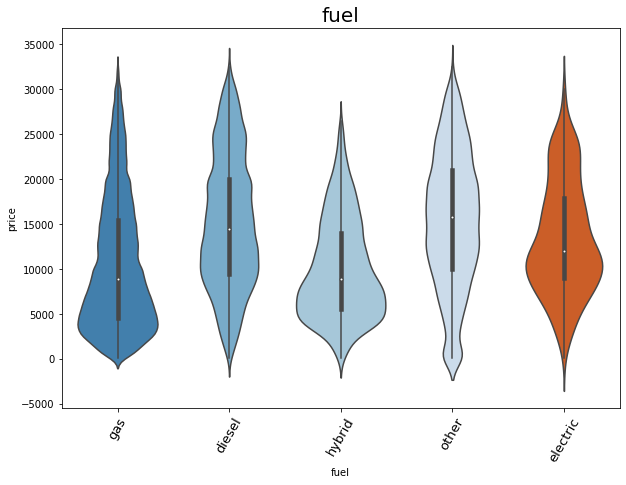

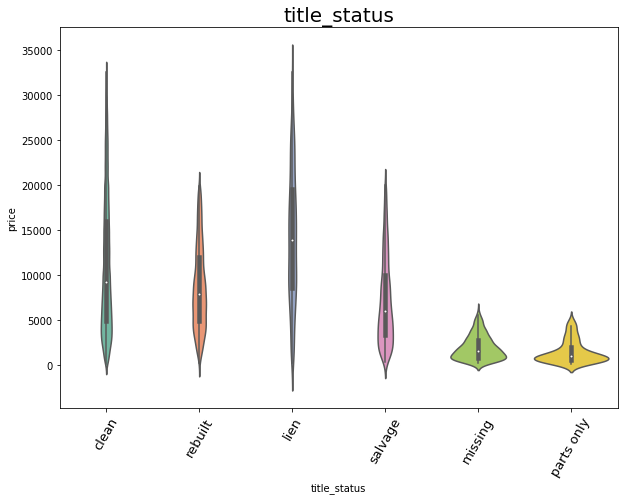

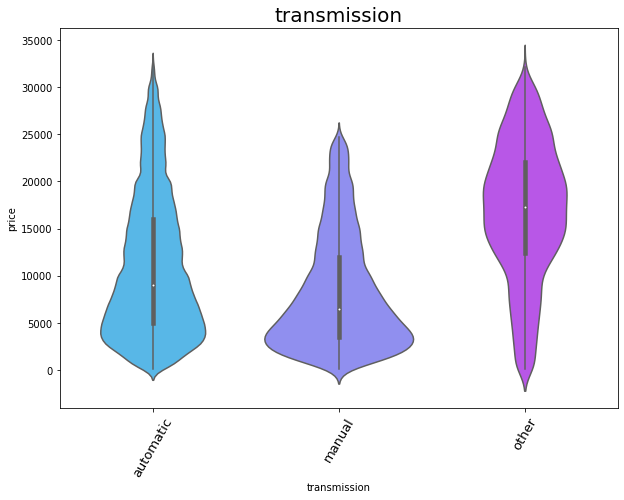

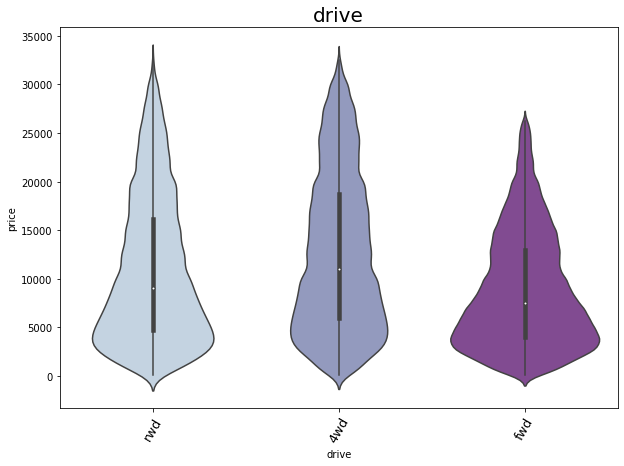

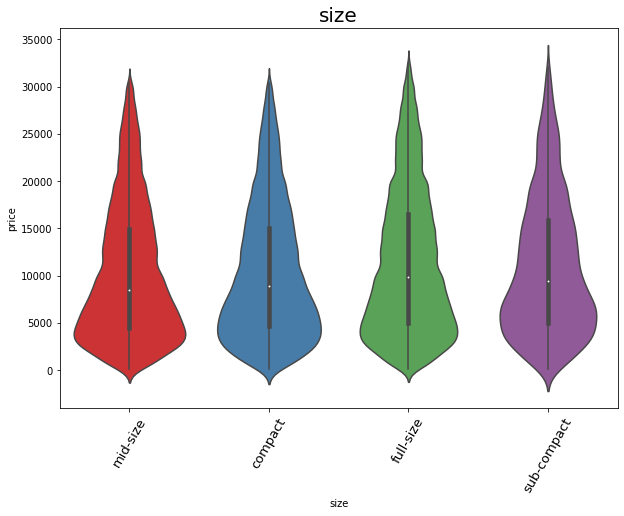

In [81]:
voilin(df)

- From the above charts we can confirm:
  - New cars have the most resell price
  - Hybrid cars are some of the cars with lowest resell price

In [82]:
df3 = df.copy()

In [83]:
df=df3.copy()

%%time
removed = 0
for i in df.price.unique():
    if df.price.value_counts()[i] <= 1:
        df.drop(df[df.price == i].index, inplace=True)
        removed+=1
        print('Removed : ',end='')
        statement(i)
statement(removed)

# 

# This concludes my Data cleaning and exploration

# 

# Pridiction models

### Since our model has more categorical values we will apply label encoding

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [85]:
x = df.drop('price',axis=1)
y = df.price
x

,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,"grand rapids, MI",2006.0,cadillac,cts,good,6 cylinders,gas,236000.0,clean,automatic,rwd,mid-size,coupe,blue
1,"grand rapids, MI",2009.0,lincoln,mkx,salvage,6 cylinders,gas,119000.0,clean,automatic,rwd,mid-size,coupe,blue
2,"grand rapids, MI",2010.0,cadillac,srx premium collection,salvage,6 cylinders,gas,129105.0,clean,automatic,rwd,mid-size,coupe,blue
4,"grand rapids, MI",2010.0,ram,2500,excellent,6 cylinders,diesel,123213.0,clean,automatic,4wd,mid-size,coupe,white
5,"grand rapids, MI",2010.0,subaru,legacy,good,4 cylinders,gas,253000.0,clean,automatic,4wd,mid-size,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525833,"abilene, TX",2003.0,ford,f350 super duty,fair,8 cylinders,diesel,136211.0,clean,automatic,rwd,mid-size,coupe,silver
525834,"abilene, TX",2002.0,jeep,wrangler,excellent,6 cylinders,gas,91000.0,clean,manual,4wd,mid-size,coupe,white
525835,"abilene, TX",2012.0,nissan,rogue s awd,good,4 cylinders,gas,99950.0,clean,automatic,4wd,mid-size,SUV,white
525836,"abilene, TX",2005.0,ford,taurus,good,6 cylinders,gas,176567.0,clean,automatic,fwd,mid-size,sedan,white


In [86]:
x[x.columns]=x[x.columns].apply(le.fit_transform)
x

,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,132,65,6,6904,2,5,2,100110,0,0,2,2,3,1
1,132,68,24,14831,5,5,2,64440,0,0,2,2,3,1
2,132,69,6,20041,5,5,2,70109,0,0,2,2,3,1
4,132,69,34,791,0,5,0,66837,0,0,0,2,3,10
5,132,69,37,13848,2,3,2,101132,0,0,0,2,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525833,1,62,13,10804,1,6,0,73863,0,0,2,2,3,9
525834,1,61,20,22472,0,5,2,47109,0,1,0,2,3,10
525835,1,71,31,17393,2,3,2,52968,0,0,0,2,0,10
525836,1,64,13,20712,2,5,2,90305,0,0,1,2,9,10


In [87]:
y

0          1500
1          8900
2          7995
4         20990
5          4950
          ...  
525833     4000
525834    11000
525835     6500
525836     3000
525837     8488
Name: price, Length: 388424, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score

In [89]:
xtrain, xtest_, ytrain, ytest_ = train_test_split(x, y, test_size=.3, random_state=0)

In [90]:
# xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=.5, random_state=0)

In [91]:
x1 = pd.concat([xtrain, ytrain], axis=1)
x1.shape

(271896, 15)

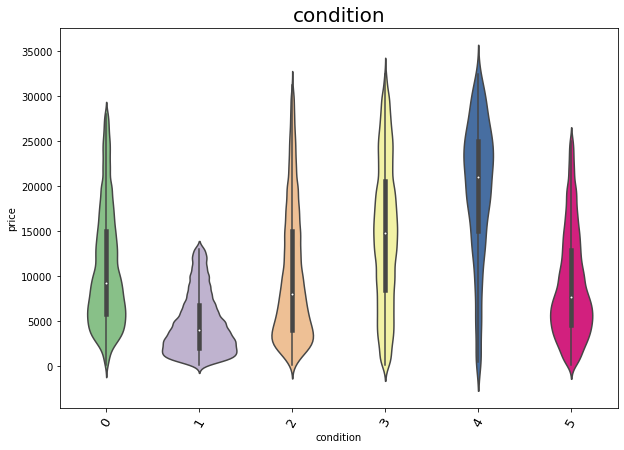

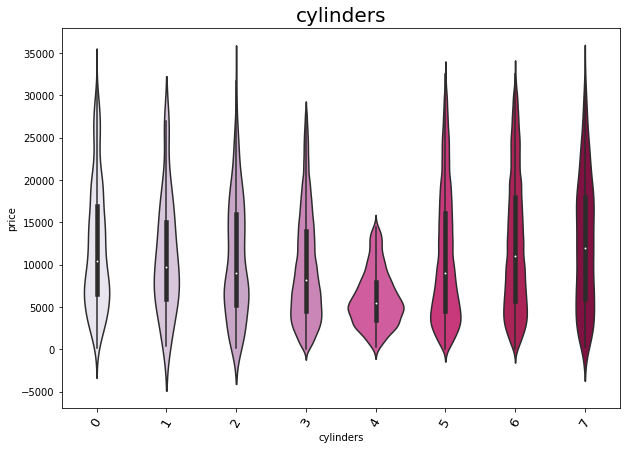

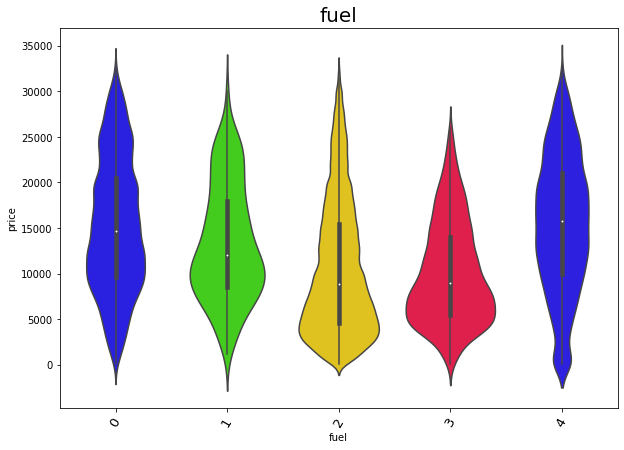

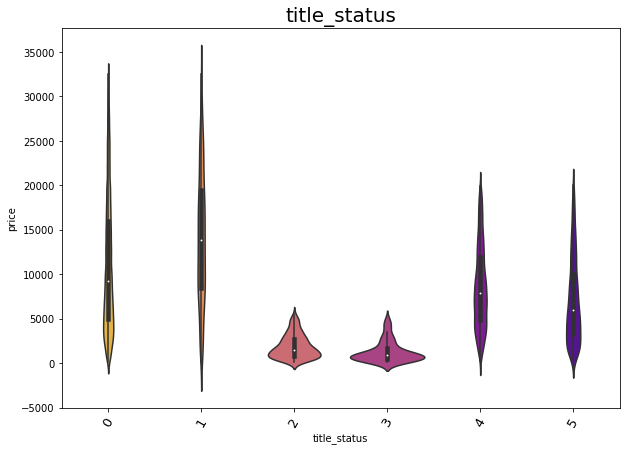

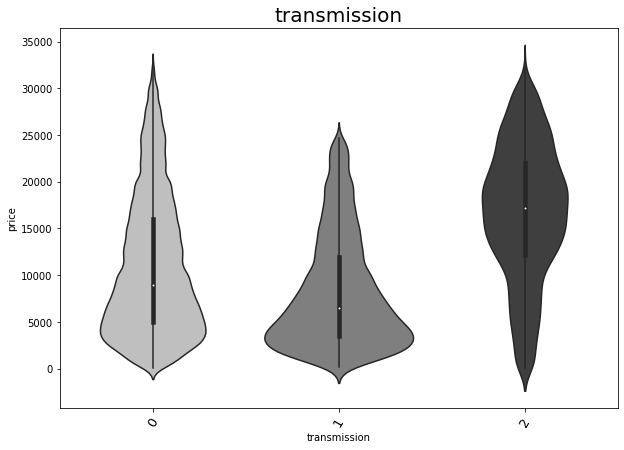

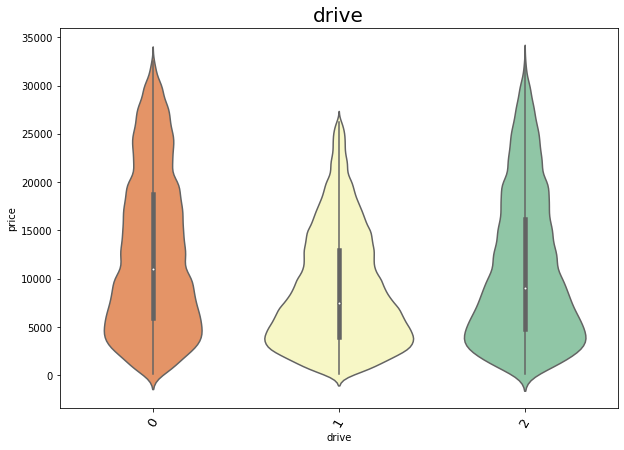

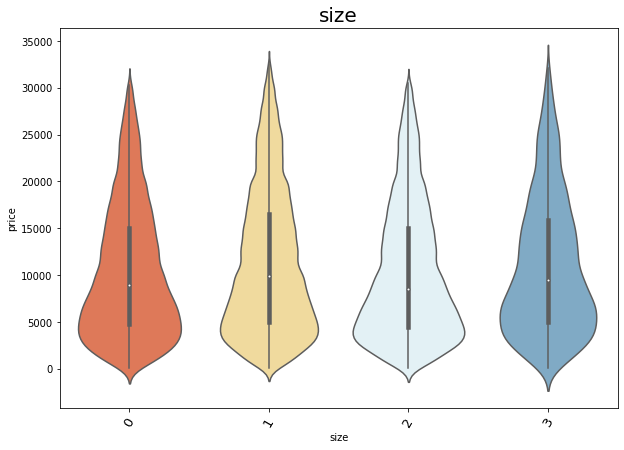

In [92]:
voilin(x1)

In [93]:
# td = [xtrain, xtest, ytrain, ytest]
td = [xtrain, xtest_, ytrain, ytest_]

# Model Testing

Since the target is of regression type, going to implement Regressors

In [94]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor

clf = LinearSVR()
feature_map = Nystroem(gamma=.2,
                       random_state=1,
                       n_components=300)
data_transformed = feature_map.fit_transform(x)
clf.fit(data_transformed, ytrain)

In [95]:
lir = LinearRegression()
lor = LogisticRegression(solver='saga', max_iter=20, warm_start=True, n_jobs=-1)
svr = LinearSVR(max_iter=20)
knn = KNeighborsRegressor()#(n_jobs=-1)
dt = tree.DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=20)#(n_estimators=50, max_depth=5, n_jobs=-1, max_samples=20)
ada = AdaBoostRegressor()
br = BaggingRegressor()
xgb = XGBRegressor()
vr = VotingRegressor(estimators=[('lir', lir),('svr', svr),('knn', knn,),('rfr', rfr,),('ada', ada),('br', br,),('xgb', xgb)])
br1 = BaggingRegressor(base_estimator=xgb)
models = [
    ('Linear Regression', lir),
    # ('Logistic Regression:', lor),
    ('Support Vector Regressor', svr),
    ('KNN Regressor', knn),#
    ('Decision Tree Regressor', dt),
    ('Random Forest Regressor', rfr),
    ('Ada Boosting Regressor', ada),
    ('Bagging Regressor', br),
    ('Xtreme Gradient Boosting Regressor', xgb),
    ('Voting Regressor (lir, svr, knn, rfr, ada, br, agb)', vr),
    ('Bagging Regressor(xgb)', br1),
]

In [103]:
%%time
tbl = {}
for name, model in models:
    statement(name)
    try:
        a, b, c, test_ac, train_ac = mmf.model_accuracy(model,td,model_report=False,models_obj=True)
        tbl[name] = [test_ac, train_ac]
    except TypeError:
        print(TypeError)
zzz = pd.DataFrame(tbl.values(),index=tbl.keys(),columns=['TestingAccuracy', 'TrainingAccuracy'])

   Linear Regression 
fitting
0.0840139389038086
predicting xtest
0.010010242462158203
predicting xtrain
0.019004344940185547
accuracy
0.008003711700439453
   Support Vector Regressor 
fitting
1.2492985725402832
predicting xtest
0.00899505615234375
predicting xtrain
0.01701068878173828
accuracy
0.008002042770385742
   KNN Regressor 
fitting
1.1040678024291992
predicting xtest
1.25883150100708
predicting xtrain
2.666452169418335
accuracy
0.008146524429321289
   Decision Tree Regressor 
fitting
2.087434768676758
predicting xtest
0.04690861701965332
predicting xtrain
0.16098904609680176
accuracy
0.007999181747436523
   Random Forest Regressor 
fitting
27.012828826904297
predicting xtest
1.000375509262085
predicting xtrain
2.277066469192505
accuracy
0.007982730865478516
   Ada Boosting Regressor 
fitting
7.372831583023071
predicting xtest
0.15704894065856934
predicting xtrain
0.2859964370727539
accuracy
0.008000612258911133
   Bagging Regressor 
fitting
13.72242546081543
predicting xtest
0

In [109]:
df_ = df.drop(['size'], axis=1)

x1 = df_.drop('price', axis=1)
y1 = df_.price

encoders = {}
for i in x1.columns:
    le = LabelEncoder()
    encoders[i] = le.fit(x1[i])
x1[x1.columns] = x1[x1.columns].apply(le.fit_transform)
x1 = x1.values

cols = []
for i in cat.CategoricalVariables.values:
    if int(i.split('>')[1]) <= 20:
        cols.append(i.split('=')[0])
xtrain1, xtest_1, ytrain1, ytest_1 = train_test_split(x1, y1, test_size=.2, random_state=42)
td1 = [xtrain1, xtest_1, ytrain1, ytest_1]

In [112]:
%%time
tbl = {}
nex = []
for name, model in models:
    statement(name)
    try:
        a, b, c, test_ac, train_ac = mmf.model_accuracy(model,td1,model_report=False,models_obj=True)
        tbl[name] = [test_ac, train_ac]
        nex.append('===>')
    except TypeError:
        print(TypeError)
zzz_ = pd.DataFrame(tbl.values(),index=tbl.keys(),columns=['TestingAccuracy', 'TrainingAccuracy'])

   Linear Regression 
fitting
0.09802126884460449
predicting xtest
0.002004861831665039
predicting xtrain
0.009656667709350586
accuracy
0.008009910583496094
   Support Vector Regressor 
fitting
1.377298355102539
predicting xtest
0.0030028820037841797
predicting xtrain
0.01000213623046875
accuracy
0.008008003234863281
   KNN Regressor 
fitting
1.176173210144043
predicting xtest
0.8571946620941162
predicting xtrain
3.3145670890808105
accuracy
0.008018016815185547
   Decision Tree Regressor 
fitting
2.4389452934265137
predicting xtest
0.04412484169006348
predicting xtrain
0.1828606128692627
accuracy
0.009995222091674805
   Random Forest Regressor 
fitting
30.287273645401
predicting xtest
0.7398848533630371
predicting xtrain
2.8497347831726074
accuracy
0.008994340896606445
   Ada Boosting Regressor 
fitting
8.617035627365112
predicting xtest
0.0870201587677002
predicting xtrain
0.3320796489715576
accuracy
0.009007930755615234
   Bagging Regressor 
fitting
15.81706976890564
predicting xtest

In [113]:
diff = []
for i in zzz.index:
    diff.append(['===>', (zzz_.TestingAccuracy[i] - zzz.TestingAccuracy[i]), (zzz_.TrainingAccuracy[i] - zzz.TrainingAccuracy[i]), (lambda x, y : x if x>y else y)(zzz.TestingAccuracy[i], zzz_.TestingAccuracy[i])])
diff = dict(zip(zzz.index,diff))

diff = pd.DataFrame(diff.values(),index=diff.keys(),columns=['Difference', 'Testing', 'Training', 'Best'])

first = pd.concat([zzz, pd.DataFrame(nex, index=zzz.index, columns=['Aftertuning']),zzz_, diff], axis=1)
first

,TestingAccuracy,TrainingAccuracy,Aftertuning,TestingAccuracy,TrainingAccuracy,Difference,Testing,Training,Best
Linear Regression,40.367578,40.057241,===>,39.943909,40.186833,===>,-0.423669,0.129592,40.367578
Support Vector Regressor,-542.680020,-541.758384,===>,-53.745387,-53.592026,===>,488.934633,488.166358,-53.745387
KNN Regressor,40.383117,61.231947,===>,41.562641,61.851694,===>,1.179524,0.619747,41.562641
Decision Tree Regressor,63.234480,99.990534,===>,65.437722,99.984010,===>,2.203242,-0.006524,65.437722
Random Forest Regressor,80.694990,96.951498,===>,81.510546,97.049562,===>,0.815556,0.098064,81.510546
Ada Boosting Regressor,48.714733,48.659302,===>,48.138722,48.528408,===>,-0.576011,-0.130894,48.714733
Bagging Regressor,79.571812,96.296244,===>,80.464081,96.450698,===>,0.892269,0.154453,80.464081
Xtreme Gradient Boosting Regressor,81.043393,82.432270,===>,80.608657,82.246476,===>,-0.434736,-0.185794,81.043393
"Voting Regressor (lir, svr, knn, rfr, ada, br, agb)",44.127950,52.043500,===>,71.244754,79.007118,===>,27.116804,26.963618,71.244754
Bagging Regressor(xgb),81.569325,82.939068,===>,81.438305,82.912944,===>,-0.131020,-0.026124,81.569325


In [114]:
lir = LinearRegression()
lor = LogisticRegression(solver='saga', max_iter=20, warm_start=True, n_jobs=-1)
svr = LinearSVR(max_iter=20)
knn = KNeighborsRegressor(n_jobs=-1)
dt = tree.DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=50, max_depth=5, n_jobs=-1, max_samples=20, random_state=0)
ada = AdaBoostRegressor()
br = BaggingRegressor()
xgb = XGBRegressor()
vr = VotingRegressor(estimators=[('lir', lir),('svr', svr),('knn', knn,),('rfr', rfr,),('ada', ada),('br', br,),('xgb', xgb)])
br1 = BaggingRegressor(base_estimator=xgb)
models = [
    ('Linear Regression', lir),
    # ('Logistic Regression:', lor),
    ('Support Vector Regressor', svr),
    ('KNN Regressor', knn),#
    ('Random Forest Regressor', rfr),
    ('Decision Tree Regressor', dt),
    ('Ada Boosting Regressor', ada),
    ('Bagging Regressor', br),
    ('Xtreme Gradient Boosting Regressor', xgb),
    ('Voting Regressor (lir, svr, knn, rfr, ada, br, agb)', vr),
    ('Bagging Regressor(xgb)', br1),
]

In [115]:
%%time
tbl = {' After Removal':['', '']}
for name, model in models:
    statement(name)
    try:
        a, b, c, test_ac, train_ac = mmf.model_accuracy(model,td,model_report=False,models_obj=True)
        tbl[name] = [test_ac, train_ac]
    except TypeError:
        print(TypeError)
zzz = pd.DataFrame(tbl.values(),index=tbl.keys(),columns=['TestingAccuracy', 'TrainingAccuracy'])

   Linear Regression 
fitting
0.07853341102600098
predicting xtest
0.0
predicting xtrain
0.015630245208740234
accuracy
0.0
   Support Vector Regressor 
fitting
1.343667984008789
predicting xtest
0.009010076522827148
predicting xtrain
0.017998695373535156
accuracy
0.008018016815185547
   KNN Regressor 
fitting
1.0363922119140625
predicting xtest
0.31505751609802246
predicting xtrain
0.6783473491668701
accuracy
0.010004281997680664
   Random Forest Regressor 
fitting
0.19327688217163086
predicting xtest
0.07060837745666504
predicting xtrain
0.11605095863342285
accuracy
0.008997678756713867
   Decision Tree Regressor 
fitting
2.169994592666626
predicting xtest
0.06301426887512207
predicting xtrain
0.14524006843566895
accuracy
0.00879526138305664
   Ada Boosting Regressor 
fitting
6.992707252502441
predicting xtest
0.10979270935058594
predicting xtrain
0.267181396484375
accuracy
0.0
   Bagging Regressor 
fitting
14.047159433364868
predicting xtest
0.6078555583953857
predicting xtrain
1.342

In [116]:
cols = []
for i in cat.CategoricalVariables.values:
    if int(i.split('>')[1]) <= 20:
        cols.append(i.split('=')[0])

In [119]:
%%time
tbl = {' After Removal':['', '']}
nex = ['']
for name, model in models:
    statement(name)
    try:
        a, b, c, test_ac, train_ac = mmf.model_accuracy(model,td1,model_report=False,models_obj=True)
        tbl[name] = [test_ac, train_ac]
        nex.append('===>')
    except TypeError:
        print(TypeError)
zzz_ = pd.DataFrame(tbl.values(),index=tbl.keys(),columns=['TestingAccuracy', 'TrainingAccuracy'])

   Linear Regression 
fitting
0.20610523223876953
predicting xtest
0.00400090217590332
predicting xtrain
0.02400994300842285
accuracy
0.020008325576782227
   Support Vector Regressor 
fitting
2.7023773193359375
predicting xtest
0.004002809524536133
predicting xtrain
0.016004085540771484
accuracy
0.016002178192138672
   KNN Regressor 
fitting
1.693272352218628
predicting xtest
0.3584117889404297
predicting xtrain
1.1112213134765625
accuracy
0.01562356948852539
   Random Forest Regressor 
fitting
0.32451367378234863
predicting xtest
0.07854080200195312
predicting xtrain
0.1741647720336914
accuracy
0.01600337028503418
   Decision Tree Regressor 
fitting
3.8231983184814453
predicting xtest
0.04391980171203613
predicting xtrain
0.1920468807220459
accuracy
0.012001514434814453
   Ada Boosting Regressor 
fitting
7.919583797454834
predicting xtest
0.10402607917785645
predicting xtrain
0.2962682247161865
accuracy
0.007813215255737305
   Bagging Regressor 
fitting
16.70011854171753
predicting xt

In [120]:
diff = []
for i in zzz.index:
    if i == ' After Removal':
        diff.append(['','','',''])
    else:
        diff.append(['===>', (zzz_.TestingAccuracy[i] - zzz.TestingAccuracy[i]), (zzz_.TrainingAccuracy[i] - zzz.TrainingAccuracy[i]), (lambda x, y : x if x>y else y)(zzz.TestingAccuracy[i], zzz_.TestingAccuracy[i])])
diff = dict(zip(zzz.index,diff))

diff = pd.DataFrame(diff.values(),index=diff.keys(),columns=['Difference', 'Testing', 'Training', 'Best'])

second = pd.concat([zzz, pd.DataFrame(nex, index=zzz.index, columns=['Aftertuning']),zzz_, diff],axis=1)
second

,TestingAccuracy,TrainingAccuracy,Aftertuning,TestingAccuracy,TrainingAccuracy,Difference,Testing,Training,Best
After Removal,,,,,,,,,
Linear Regression,40.367578,40.057241,===>,39.943909,40.186833,===>,-0.423669,0.129592,40.367578
Support Vector Regressor,-87.956327,-88.188473,===>,-1171.879308,-1164.891756,===>,-1083.92298,-1076.703283,-87.956327
KNN Regressor,40.383117,61.231947,===>,41.562641,61.851694,===>,1.179524,0.619747,41.562641
Random Forest Regressor,46.716333,46.397036,===>,46.150179,46.031747,===>,-0.566155,-0.36529,46.716333
Decision Tree Regressor,63.080759,99.990534,===>,65.499361,99.98401,===>,2.418602,-0.006524,65.499361
Ada Boosting Regressor,48.857424,48.785005,===>,49.381245,49.575135,===>,0.523822,0.79013,49.381245
Bagging Regressor,79.576435,96.269274,===>,80.397537,96.436728,===>,0.821103,0.167455,80.397537
Xtreme Gradient Boosting Regressor,81.043393,82.43227,===>,80.608657,82.246476,===>,-0.434736,-0.185794,81.043393
"Voting Regressor (lir, svr, knn, rfr, ada, br, agb)",63.40307,68.660837,===>,63.949896,69.114994,===>,0.546826,0.454156,63.949896


In [121]:
pd.concat([first, second])

,TestingAccuracy,TrainingAccuracy,Aftertuning,TestingAccuracy,TrainingAccuracy,Difference,Testing,Training,Best
Linear Regression,40.367578,40.057241,===>,39.943909,40.186833,===>,-0.423669,0.129592,40.367578
Support Vector Regressor,-542.68002,-541.758384,===>,-53.745387,-53.592026,===>,488.934633,488.166358,-53.745387
KNN Regressor,40.383117,61.231947,===>,41.562641,61.851694,===>,1.179524,0.619747,41.562641
Decision Tree Regressor,63.23448,99.990534,===>,65.437722,99.98401,===>,2.203242,-0.006524,65.437722
Random Forest Regressor,80.69499,96.951498,===>,81.510546,97.049562,===>,0.815556,0.098064,81.510546
Ada Boosting Regressor,48.714733,48.659302,===>,48.138722,48.528408,===>,-0.576011,-0.130894,48.714733
Bagging Regressor,79.571812,96.296244,===>,80.464081,96.450698,===>,0.892269,0.154453,80.464081
Xtreme Gradient Boosting Regressor,81.043393,82.43227,===>,80.608657,82.246476,===>,-0.434736,-0.185794,81.043393
"Voting Regressor (lir, svr, knn, rfr, ada, br, agb)",44.12795,52.0435,===>,71.244754,79.007118,===>,27.116804,26.963618,71.244754
Bagging Regressor(xgb),81.569325,82.939068,===>,81.438305,82.912944,===>,-0.13102,-0.026124,81.569325


In [122]:
mmf.model_accuracy(XGBRegressor(n_estimators=300),td)

fitting
26.823928356170654
predicting xtest
0.23606252670288086
predicting xtrain
0.3443489074707031
accuracy
0.012003898620605469
 Training Accuracy      :    86.74018292276268% 
 Test Accuracy          :    83.65776014310768% 
Mean Absolute Error     :    1996.6217983258368 
Mean Squared Error      :    8907153.038170235 
Root Mean Squared Error :    2984.4853891701723 


In [123]:
mmf.model_accuracy(XGBRegressor(n_estimators=300),td1)

fitting
33.23054909706116
predicting xtest
0.22385525703430176
predicting xtrain
0.39608335494995117
accuracy
0.012001276016235352
 Training Accuracy      :    86.62953250548695% 
 Test Accuracy          :    83.51337404616336% 
Mean Absolute Error     :    1998.6507865101182 
Mean Squared Error      :    8987254.013963087 
Root Mean Squared Error :    2997.874916330414 


In [125]:
best_xgb,a,b,c,d=mmf.model_accuracy(XGBRegressor(n_estimators=2500),td,models_obj=True)

fitting
199.55167937278748
predicting xtest
1.129338264465332
predicting xtrain
2.1861913204193115
accuracy
0.015626192092895508
 Training Accuracy      :    95.29497270048157% 
 Test Accuracy          :    86.52859568011809% 
Mean Absolute Error     :    1780.428179493225 
Mean Squared Error      :    7342436.591741096 
Root Mean Squared Error :    2709.693080727243 


In [126]:
mmf.model_accuracy(XGBRegressor(n_estimators=2500),td1)

fitting
222.62359309196472
predicting xtest
0.8509736061096191
predicting xtrain
2.491616725921631
accuracy
0.008001327514648438
 Training Accuracy      :    94.86734998116503% 
 Test Accuracy          :    86.6486780741215% 
Mean Absolute Error     :    1767.9300099997215 
Mean Squared Error      :    7278124.821054809 
Root Mean Squared Error :    2697.7999964887704 


In [127]:
mmf.model_accuracy(RandomForestRegressor(n_estimators=100, random_state=0),td)

fitting
150.3020670413971
predicting xtest
5.512207508087158
predicting xtrain
14.210278749465942
accuracy
0.007989168167114258
 Training Accuracy      :    97.42483484286096% 
 Test Accuracy          :    81.58520351570098% 
Mean Absolute Error     :    2020.1450290529554 
Mean Squared Error      :    10036776.591749383 
Root Mean Squared Error :    3168.0872134064402 


In [128]:
mmf.model_accuracy(RandomForestRegressor(n_estimators=20, random_state=0),td)

fitting
28.827876329421997
predicting xtest
1.0802860260009766
predicting xtrain
2.6045022010803223
accuracy
0.008004426956176758
 Training Accuracy      :    96.93468388799958% 
 Test Accuracy          :    80.68673547879875% 
Mean Absolute Error     :    2079.126197134294 
Mean Squared Error      :    10526476.435508402 
Root Mean Squared Error :    3244.4531797374425 


In [129]:
mmf.model_accuracy(RandomForestRegressor(n_estimators=100, random_state=0),td1)

fitting
164.42526650428772
predicting xtest
3.6920034885406494
predicting xtrain
14.175474643707275
accuracy
0.008003711700439453
 Training Accuracy      :    97.5326607990312% 
 Test Accuracy          :    82.39378547134126% 
Mean Absolute Error     :    1955.23958732323 
Mean Squared Error      :    9597568.51622882 
Root Mean Squared Error :    3097.9942731110427 


In [130]:
mmf.model_accuracy(RandomForestRegressor(n_estimators=20, random_state=0),td1)

fitting
30.481147050857544
predicting xtest
0.6961712837219238
predicting xtrain
2.7937252521514893
accuracy
0.008016109466552734
 Training Accuracy      :    97.0419918857164% 
 Test Accuracy          :    81.57428465263811% 
Mean Absolute Error     :    2014.4627120802181 
Mean Squared Error      :    10044298.007330172 
Root Mean Squared Error :    3169.274050524847 


# 

In [137]:
%%time
model,a,b,c,d = mmf.model_accuracy(BaggingRegressor(XGBRegressor(n_estimators=2500,learning_rate=.3,max_depth=10,gamma=0,subsample=.9,n_jobs=-1),random_state=42,n_jobs=-1),td1,models_obj=True)

fitting
2026.5558087825775
predicting xtest
94.40448236465454
predicting xtrain
80.871248960495
accuracy
0.06290912628173828
 Training Accuracy      :    97.92206466627401% 
 Test Accuracy          :    87.92887883819141% 
Mean Absolute Error     :    1608.6894011778093 
Mean Squared Error      :    6580256.774082564 
Root Mean Squared Error :    2565.2011176674946 
Wall time: 36min 41s


In [3]:
# %%time
# model,a,b,c,d = mmf.model_accuracy(RandomForestRegressor(n_estimators=100, random_state=0),td1,models_obj=True)

fitting
169.49914598464966
predicting xtest
3.921046733856201
predicting xtrain
15.833167791366577
accuracy
0.0040090084075927734
 Training Accuracy      :    97.51118505770737% 
 Test Accuracy          :    82.39202185311856% 
Mean Absolute Error     :    1949.9669043956692 
Mean Squared Error      :    9576092.388200797 
Root Mean Squared Error :    3094.526197691788 
Wall time: 3min 9s


In [41]:
model,a,b,c,d = mmf.model_accuracy(RandomForestRegressor(n_estimators=5, max_depth=20, random_state=42),td1, models_obj=True)

fitting
6.717881202697754
predicting xtest
0.09902334213256836
predicting xtrain
0.37902235984802246
accuracy
0.01601886749267578
 Training Accuracy      :    90.92948929211587% 
 Test Accuracy          :    77.79957471610311% 
Mean Absolute Error     :    2276.502813695072 
Mean Squared Error      :    12073693.06132392 
Root Mean Squared Error :    3474.7220120930424 


In [ ]:
locations = sorted(df_.city.unique())
years = sorted(df_.year.unique().astype(int))
manu = sorted(df_.manufacturer.unique())
mods = sorted(df_.make.unique())
conditions = sorted(df_.condition.unique())
cylinders = sorted(df_.cylinders.unique())
fuels = sorted(df_.fuel.unique())
titles = sorted(df_.title_status.unique())
transmissions = sorted(df_.transmission.unique())
drives = sorted(df_.drive.unique())
types = sorted(df_.type.unique())
colors = sorted(df_.paint_color.unique())

unique_vals = {'city':locations,'year':years,'manufacturer':manu,'make':mods,'condition':conditions,'cylinders':cylinders,'fuel':fuels,'title_status':titles,
              'transmission':transmissions,'drives':drives,'type':types,'paint_color':colors}
unique_vals = pd.Series(unique_vals)

In [1]:
import joblib

In [139]:
joblib.dump(model,'./Datasets/model_rf')
joblib.dump(unique_vals,'./Datasets/unique_vals')
joblib.dump(encoders,'./Datasets/encoders_')

['encoders_']

In [140]:
joblib.load('model_')

BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             enable_categorical=False, gamma=0,
                                             gpu_id=None, importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.3,
                                             max_delta_step=None, max_depth=10,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=2500, n_jobs=-1,
                                             num_parallel_tree=None,
                                           